In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from turtle import color
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# **| Trabajo sobre Grecia**

In [2]:
resultados = {}

# Entire home/apt

In [3]:
#Cargar desde un archivo .csv
df = pd.read_csv('room_type_Grecia/Entire_homeapt_Grecia.csv')

df.head()

last_scraped       source                                              name  \
0   2024-09-23  city scrape  3 bedrooms, 2 bathrooms, 2nd floor with elevator   
1   2024-09-23  city scrape      Athens Quality Apartments - Deluxe Apartment   
2   2024-09-23  city scrape                Athens Quality Apartments - Studio   
3   2024-09-23  city scrape    AQA-No2 1-bedroom, smart tv, fiber connection,   
4   2024-09-23  city scrape      AQA-No7, Great mattress, high speed internet   

                                         description  \
0  The apartment is 3-bedroom apartment with 2-ba...   
1  Athens Quality Apartments - Deluxe apartment i...   
2  The Studio is an <br />-excellent located <br ...   
3  AQA No2 is 1-bedroom apartment (47m2), on the ...   
4  THE MATTRESS - KING KOIL - Camden Luxury 160x2...   

                               neighborhood_overview  host_name  host_since  \
0  Ampelokipi district is nice multinational and ...  Emmanouil  2009-09-08   
1  Ampelokipi district is nice multinational and ...  Emmanouil  2009-09-08   
2  Ampelokipi district is nice multinational and ...  Emmanouil  2009-09-08   
3  Ampelokipi district is nice multinational and ...  Emmanouil  2009-09-08   
4                                      No disponible  Emmanouil  2009-09-08   

    host_location                                         host_about  \
0  Athens, Greece  Athens Quality Apartments is a company started...   
1  Athens, Greece  Athens Quality Apartments is a company started...   
2  Athens, Greece  Athens Quality Apartments is a company started...   
3  Athens, Greece  Athens Quality Apartments is a company started...   
4  Athens, Greece  Athens Quality Apartments is a company started...   

  host_response_time  ... availability_365 number_of_reviews  \
0     within an hour  ...              340              53.0   
1     within an hour  ...              350              82.0   
2     within an hour  ...              341             107.0   
3     within an hour  ...              350              36.0   
4     within an hour  ...              358              25.0   

  number_of_reviews_l30d review_scores_rating review_scores_accuracy  \
0                    0.0                 4.87                   4.89   
1                    0.0                 4.83                   4.85   
2                    0.0                 4.85                   4.92   
3                    0.0                 4.83                   4.97   
4                    0.0                 4.84                   4.88   

  review_scores_cleanliness review_scores_communication  \
0                      4.85                        4.91   
1                      4.85                        4.90   
2                      4.93                        4.97   
3                      4.91                        4.89   
4                      4.96                        4.96   

  review_scores_location review_scores_value reviews_per_month  
0                   4.58                4.75              0.33  
1                   4.80                4.75              0.56  
2                   4.79                4.78              0.73  
3                   4.82                4.82              0.21  
4                   4.75                4.71              0.17  

[5 rows x 50 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 13001 non-null  object 
 1   source                       13001 non-null  object 
 2   name                         13001 non-null  object 
 3   description                  13001 non-null  object 
 4   neighborhood_overview        13001 non-null  object 
 5   host_name                    13001 non-null  object 
 6   host_since                   13001 non-null  object 
 7   host_location                13001 non-null  object 
 8   host_about                   13001 non-null  object 
 9   host_response_time           13001 non-null  object 
 10  host_is_superhost            13001 non-null  object 
 11  host_verifications           13001 non-null  object 
 12  host_identity_verified       13001 non-null  object 
 13  neighbourhood_cl

In [5]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    df[var] = df[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [6]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
df["property_type_encoded"] = le.fit_transform(df["property_type"])

In [7]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable"),
    ("price", "property_type_encoded")
]

In [8]:
#eliminamos la columna tipo string
df = df.select_dtypes(include=[np.number])

#Encontramos todas las correlaciones entre las variables
corr_Factors = df.corr()
corr_Factors

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                0.057729   
host_identity_verified                0.057729                1.000000   
instant_bookable                     -0.032886               -0.019517   
id                                   -0.098134               -0.044293   
host_response_rate                    0.071427                0.115897   
host_acceptance_rate                  0.086757               -0.004989   
host_listings_count                  -0.131178                0.034535   
host_total_listings_count            -0.116514                0.036375   
latitude                             -0.072130                0.024085   
longitude                            -0.059512               -0.013483   
accommodates                          0.036413               -0.007553   
bathrooms                             0.049291                0.008512   
bedrooms                              0.009678                0.005022   
beds                                  0.044976                0.011040   
price                                 0.117064               -0.016078   
minimum_nights                       -0.005132                0.018679   
maximum_nights                       -0.043903               -0.028704   
minimum_nights_avg_ntm               -0.030310                0.004599   
maximum_nights_avg_ntm                0.085849                0.006986   
availability_30                      -0.113194               -0.005825   
availability_60                      -0.067476               -0.002777   
availability_90                      -0.033112               -0.000221   
availability_365                      0.014718               -0.006879   
number_of_reviews                     0.207057                0.039977   
number_of_reviews_l30d                0.235272                0.050004   
review_scores_rating                  0.243528               -0.006626   
review_scores_accuracy                0.212442               -0.003788   
review_scores_cleanliness             0.229044               -0.009355   
review_scores_communication           0.155236                0.002895   
review_scores_location                0.109254               -0.007335   
review_scores_value                   0.209557                0.005314   
reviews_per_month                     0.248548                0.051985   
property_type_encoded                -0.066472               -0.015916   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                   -0.032886 -0.098134            0.071427   
host_identity_verified              -0.019517 -0.044293            0.115897   
instant_bookable                     1.000000  0.116473           -0.018772   
id                                   0.116473  1.000000           -0.042318   
host_response_rate                  -0.018772 -0.042318            1.000000   
host_acceptance_rate                 0.252629 -0.002673            0.068583   
host_listings_count                  0.242819  0.040494           -0.002355   
host_total_listings_count            0.230914  0.042144           -0.012029   
latitude                            -0.088087  0.046177           -0.025762   
longitude                           -0.028217  0.014037           -0.032503   
accommodates                         0.043778 -0.047096            0.008279   
bathrooms                            0.014596 -0.035907            0.002153   
bedrooms                            -0.004826  0.019823           -0.001181   
beds                                -0.014230 -0.122201            0.014284   
price                                0.070483 -0.050228            0.009014   
minimum_nights                      -0.186009 -0.090302           -0.000072   
maximum_nights                       0.028778 -0.334298            0.005911   
minimum_nights_avg_ntm              -0.121743 -0.059784            0.003475   
maximum_nig

In [9]:
corr_Factors1 = abs(corr_Factors)
corr_Factors1

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                0.057729   
host_identity_verified                0.057729                1.000000   
instant_bookable                      0.032886                0.019517   
id                                    0.098134                0.044293   
host_response_rate                    0.071427                0.115897   
host_acceptance_rate                  0.086757                0.004989   
host_listings_count                   0.131178                0.034535   
host_total_listings_count             0.116514                0.036375   
latitude                              0.072130                0.024085   
longitude                             0.059512                0.013483   
accommodates                          0.036413                0.007553   
bathrooms                             0.049291                0.008512   
bedrooms                              0.009678                0.005022   
beds                                  0.044976                0.011040   
price                                 0.117064                0.016078   
minimum_nights                        0.005132                0.018679   
maximum_nights                        0.043903                0.028704   
minimum_nights_avg_ntm                0.030310                0.004599   
maximum_nights_avg_ntm                0.085849                0.006986   
availability_30                       0.113194                0.005825   
availability_60                       0.067476                0.002777   
availability_90                       0.033112                0.000221   
availability_365                      0.014718                0.006879   
number_of_reviews                     0.207057                0.039977   
number_of_reviews_l30d                0.235272                0.050004   
review_scores_rating                  0.243528                0.006626   
review_scores_accuracy                0.212442                0.003788   
review_scores_cleanliness             0.229044                0.009355   
review_scores_communication           0.155236                0.002895   
review_scores_location                0.109254                0.007335   
review_scores_value                   0.209557                0.005314   
reviews_per_month                     0.248548                0.051985   
property_type_encoded                 0.066472                0.015916   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                    0.032886  0.098134            0.071427   
host_identity_verified               0.019517  0.044293            0.115897   
instant_bookable                     1.000000  0.116473            0.018772   
id                                   0.116473  1.000000            0.042318   
host_response_rate                   0.018772  0.042318            1.000000   
host_acceptance_rate                 0.252629  0.002673            0.068583   
host_listings_count                  0.242819  0.040494            0.002355   
host_total_listings_count            0.230914  0.042144            0.012029   
latitude                             0.088087  0.046177            0.025762   
longitude                            0.028217  0.014037            0.032503   
accommodates                         0.043778  0.047096            0.008279   
bathrooms                            0.014596  0.035907            0.002153   
bedrooms                             0.004826  0.019823            0.001181   
beds                                 0.014230  0.122201            0.014284   
price                                0.070483  0.050228            0.009014   
minimum_nights                       0.186009  0.090302            0.000072   
maximum_nights                       0.028778  0.334298            0.005911   
minimum_nights_avg_ntm               0.121743  0.059784            0.003475   
maximum_nig

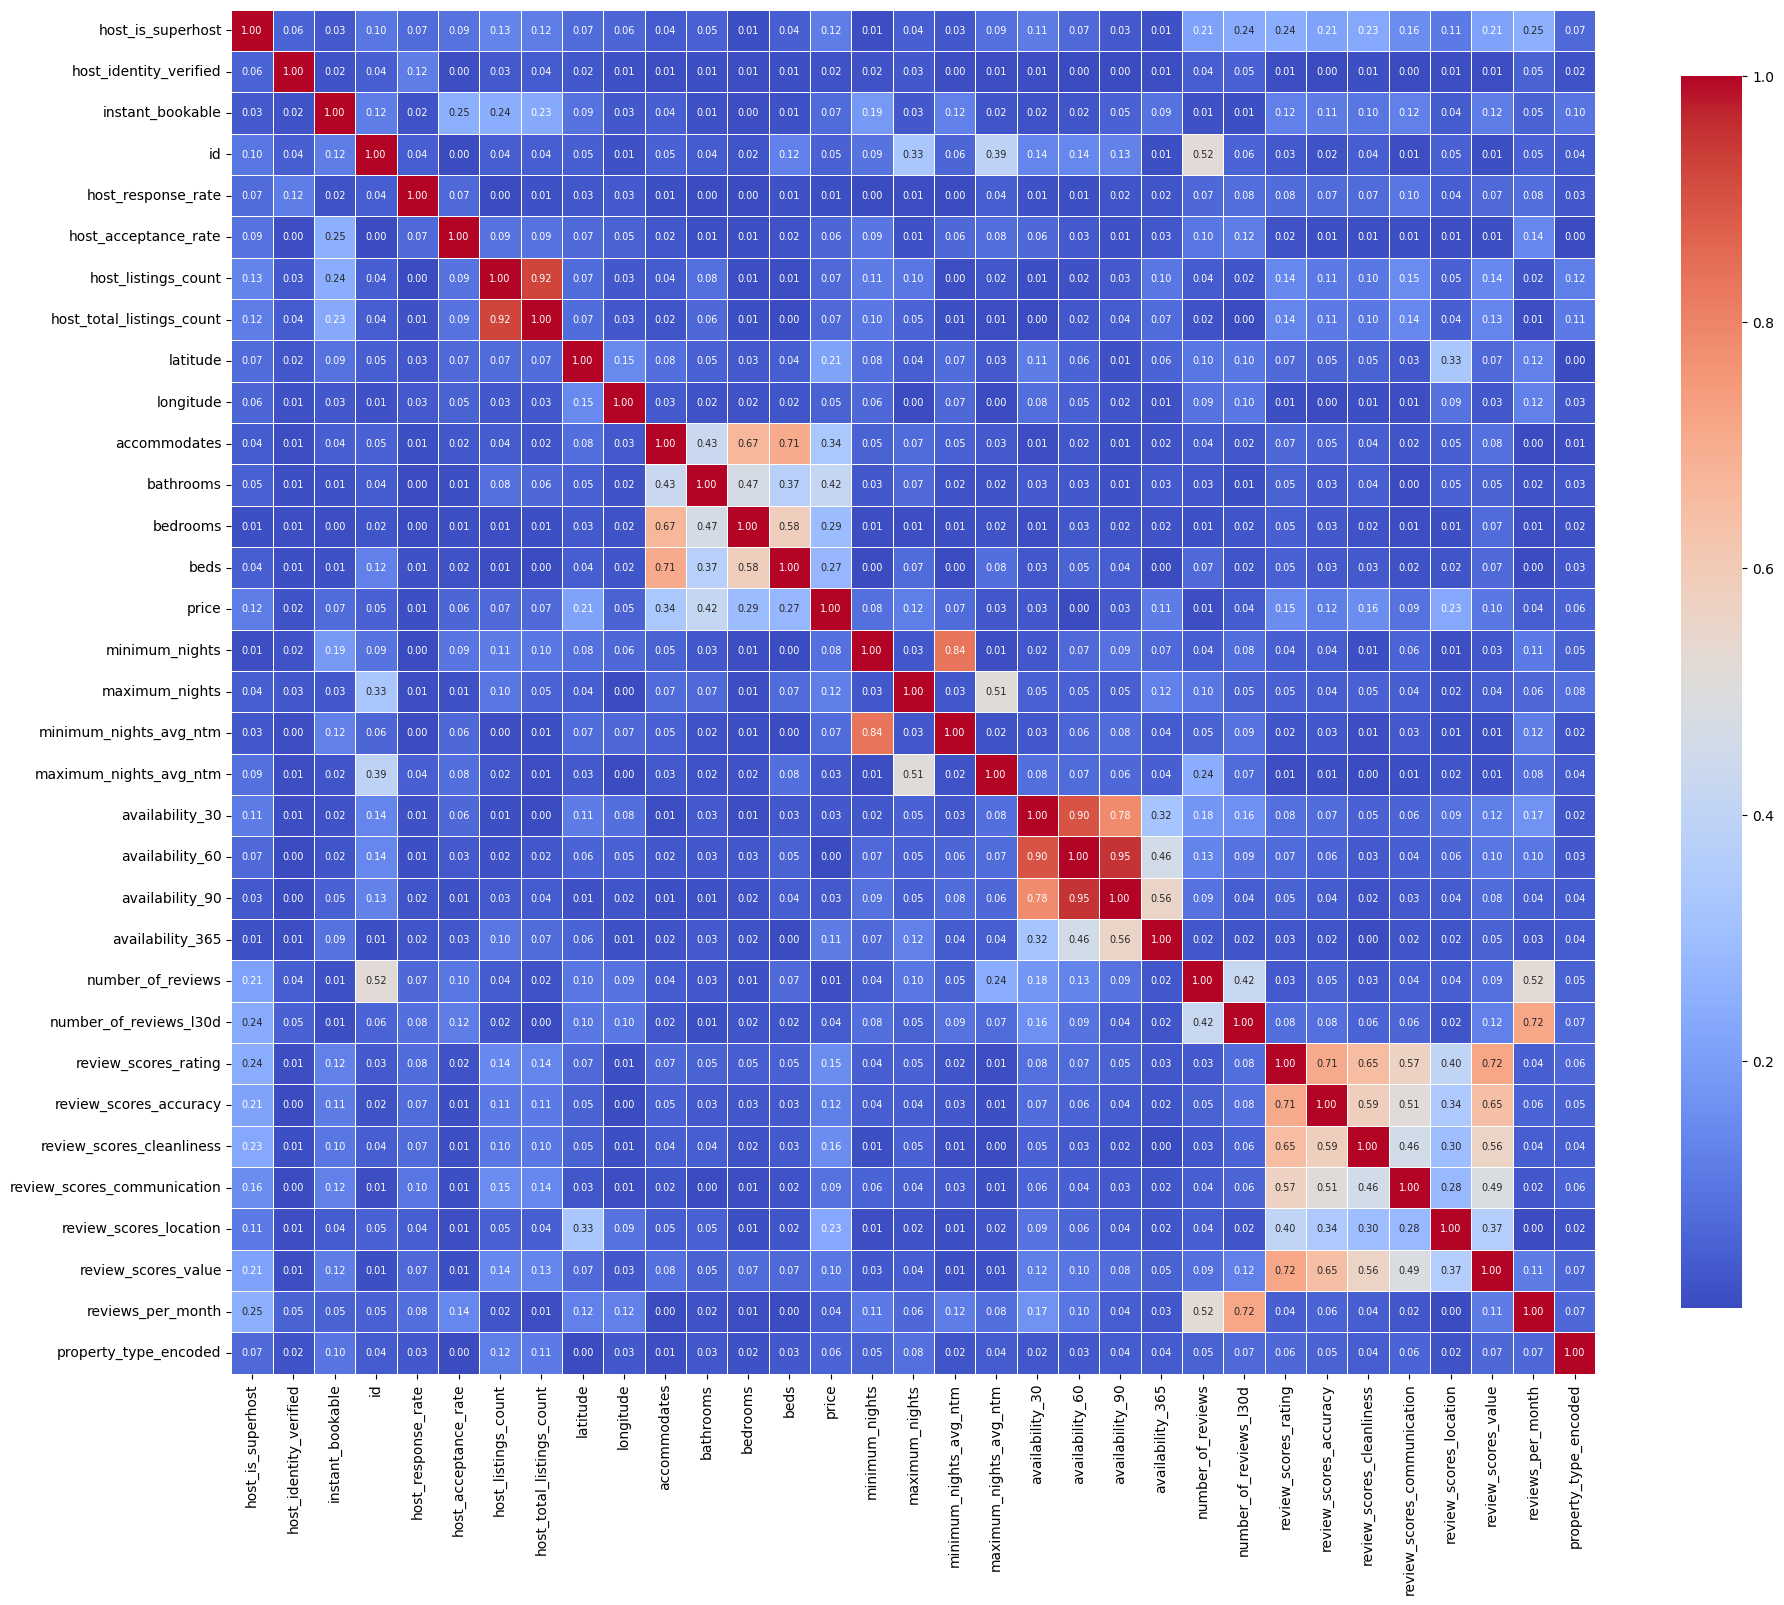

In [10]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(22, 20))

# Crear una máscara para la mitad superior (opcional, si quieres ver solo la parte baja)
mask = np.triu(np.ones_like(corr_Factors1, dtype=bool))

# Crear el mapa de calor con mejoras
heat_map = sns.heatmap(
    corr_Factors1, 
    cmap="coolwarm",   # Mejora la diferenciación entre positivos y negativos
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    square=True,       
    annot_kws={"size": 7},  # Reducimos el tamaño de los números internos
    cbar_kws={"shrink": 0.8}  # Hacemos la barra de colores más compacta
)

# Mejoramos la visibilidad de etiquetas
plt.xticks(rotation=90)  # Rota nombres en X para que no se encimen
plt.yticks(rotation=0)   # Mantiene etiquetas en Y horizontales

# Mostrar el gráfico
plt.show()



In [11]:
variables = [
    'host_acceptance_rate', 
    'host_is_superhost', 
    'host_total_listings_count', 
    'room_type', 
    'accommodates', 
    'bedrooms', 
    'price', 
    'review_scores_value', 
    'reviews_per_month' 
]

mejores_variables = {}

for var1, var2 in comparaciones:
    corr_var2 = corr_Factors1[var2].drop([var1, var2]).sort_values(ascending=False)
    
    # Filtrar las variables que están en la lista y tomar las dos primeras
    filtered_vars = [var for var in corr_var2.index if var in variables][:2]
    
    # Solo agregar al diccionario si hay al menos dos variables
    if len(filtered_vars) == 2:
        mejores_variables[(var1, var2)] = {
            var2: filtered_vars
        }

mejores_variables

{('price',
  'host_acceptance_rate'): {'host_acceptance_rate': ['reviews_per_month',
   'host_total_listings_count']},
 ('price',
  'host_is_superhost'): {'host_is_superhost': ['reviews_per_month',
   'review_scores_value']},
 ('accommodates', 'bathrooms'): {'bathrooms': ['bedrooms', 'price']},
 ('price',
  'review_scores_cleanliness'): {'review_scores_cleanliness': ['review_scores_value',
   'host_is_superhost']},
 ('price',
  'host_identity_verified'): {'host_identity_verified': ['host_is_superhost',
   'reviews_per_month']},
 ('price',
  'instant_bookable'): {'instant_bookable': ['host_acceptance_rate',
   'host_total_listings_count']},
 ('price',
  'property_type_encoded'): {'property_type_encoded': ['host_total_listings_count',
   'host_is_superhost']}}

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

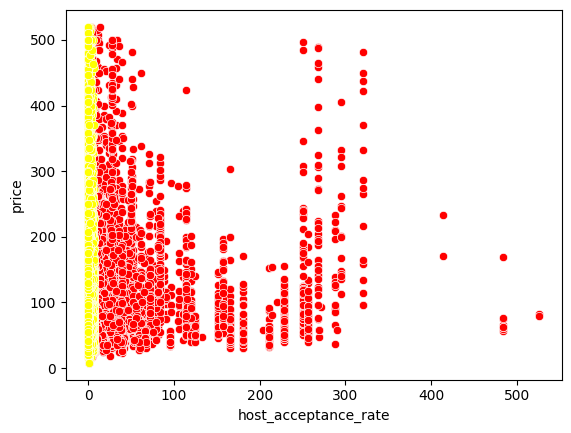

In [12]:
#Imprimimos el scater plot entre la variable dependiente e independientes 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="yellow", data=df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

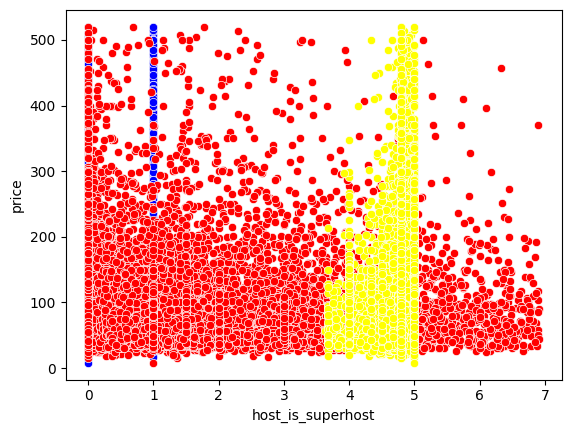

In [13]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="red", data=df)
sns.scatterplot(x='review_scores_value', y='price', color="yellow", data=df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

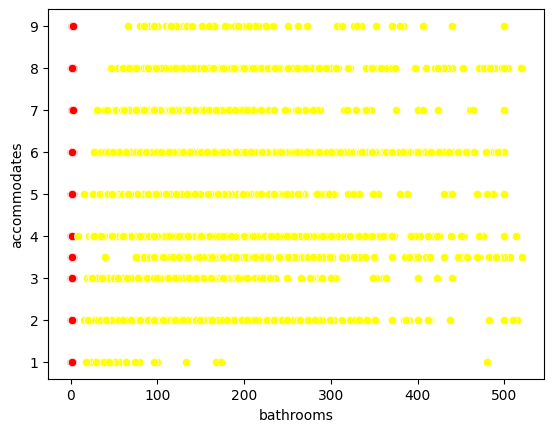

In [14]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='accommodates', color="red", data=df)
sns.scatterplot(x='price', y='accommodates', color="yellow", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

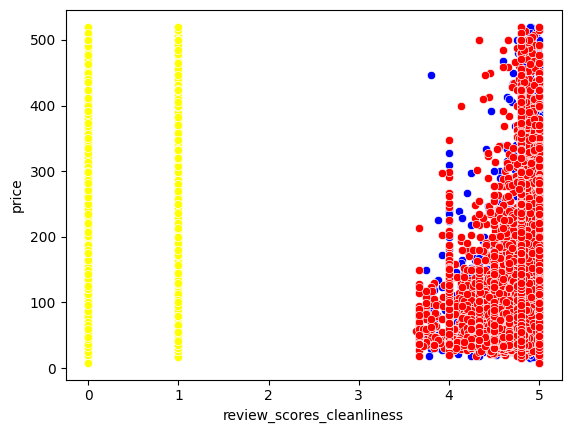

In [15]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_value', y='price', color="red", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="yellow", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

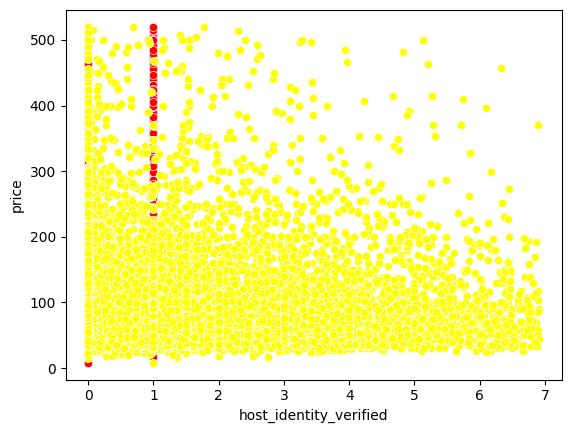

In [16]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="yellow", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

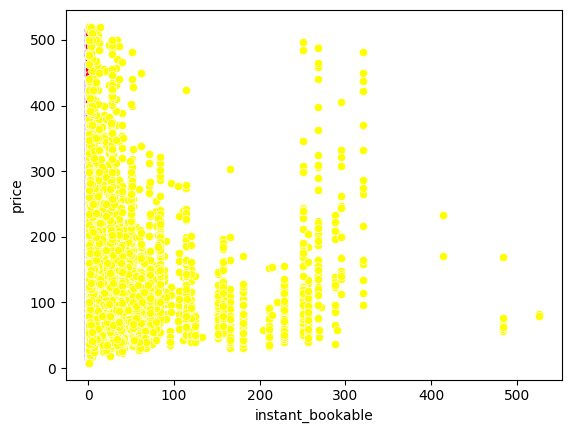

In [17]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='property_type_encoded', ylabel='price'>

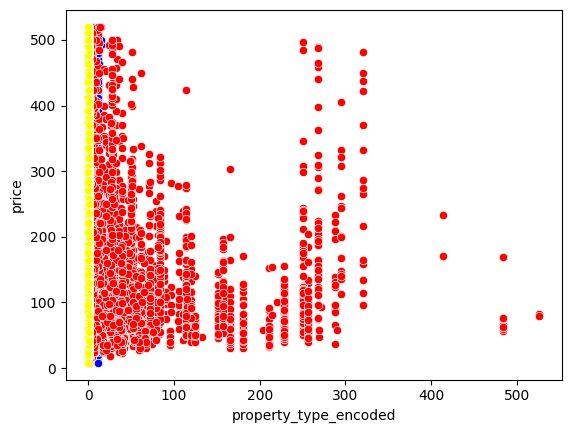

In [18]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="red", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="yellow", data=df)


**| price vs host_acceptance_rate**

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_acceptance_rate', 'host_total_listings_count','reviews_per_month']]
Var_Dep= df['price']

In [20]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [21]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [22]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'host_total_listings_count',
        'reviews_per_month'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([64.85613323,  0.0780158 , -2.10209323]),
 'rank_': 3,
 'singular_': array([6087.76137663,  179.78827366,    7.40315584]),
 'intercept_': np.float64(33.18705965630999)}

In [23]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.009979889467284009

In [24]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_acceptance_rate', 'host_total_listings_count', 'reviews_per_month']])
y_pred

array([98.28569174, 97.8022103 , 97.44485445, ..., 98.90136671,
       90.57252011, 90.57252011], shape=(13001,))

In [25]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_acceptance_rate', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  number_of_reviews_l30d  review_scores_rating  \
0      ...                     0.0                  4.87   
1      ...                     0.0                  4.83   
2      ...                     0.0                  4.85   
3      ...                     0.0                  4.83   
4      ...                     0.0                  4.84   
...    ...                     ...                   ...   
12996  ...                     0.0                  4.90   
12997  ...                     0.0                  4.90   
12998  ...                     0.0                  4.90   
12999  ...                     0.0                  4.90   
13000  ...                     0.0                  4.90   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.89                       4.85   
1                        4.85                       4.85   
2                        4.92                       4.93   
3                        4.97                       4.91   
4                        4.88                       4.96   
...                       ...                        ...   
12996                    4.90                       4.90   
12997                    4.90                       4.90   
12998                    4.90                       4.90   
12999                    4.90  

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

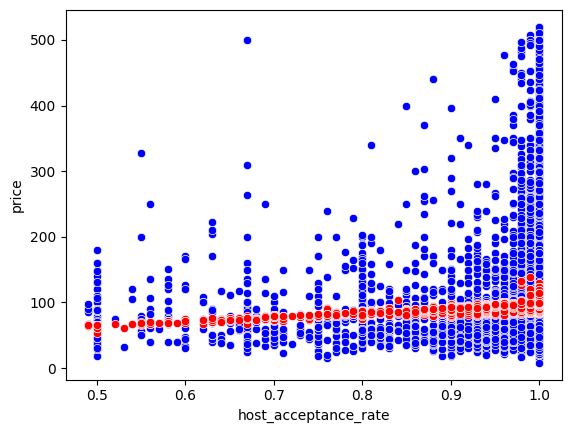

In [26]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)

In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.009979889467284009

In [28]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","price_host_acceptance_rate","correlacion")] = coef_Correl
coef_Correl

np.float64(0.0998993967313317)

**| price vs host_is_superhost**

In [29]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'reviews_per_month','review_scores_value']]
Var_Dep= df['price']

In [30]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [31]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [32]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'review_scores_value'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([16.32473257, -3.38887967, 26.40438483]),
 'rank_': 3,
 'singular_': array([180.40282516,  54.29752698,  24.86062668]),
 'intercept_': np.float64(-31.920343054369525)}

In [33]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.026067953786590436

In [34]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_is_superhost', 'reviews_per_month','review_scores_value']])
y_pred

array([108.70688715, 107.92744483, 108.14346683, ...,  94.82070411,
       111.14543668, 111.14543668], shape=(13001,))

In [35]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_is_superhost', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  review_scores_rating  review_scores_accuracy  \
0      ...                  4.87                    4.89   
1      ...                  4.83                    4.85   
2      ...                  4.85                    4.92   
3      ...                  4.83                    4.97   
4      ...                  4.84                    4.88   
...    ...                   ...                     ...   
12996  ...                  4.90                    4.90   
12997  ...                  4.90                    4.90   
12998  ...                  4.90                    4.90   
12999  ...                  4.90                    4.90   
13000  ...                  4.90                    4.90   

       review_scores_cleanliness  review_scores_communication  \
0                           4.85                         4.91   
1                           4.85                         4.90   
2                           4.93                         4.97   
3                           4.91                         4.89   
4                           4.96                         4.96   
...                          ...                          ...   
12996                       4.90                         5.00   
12997                       4.90                         5.00   
12998                       4.90              

<Axes: xlabel='host_is_superhost', ylabel='price'>

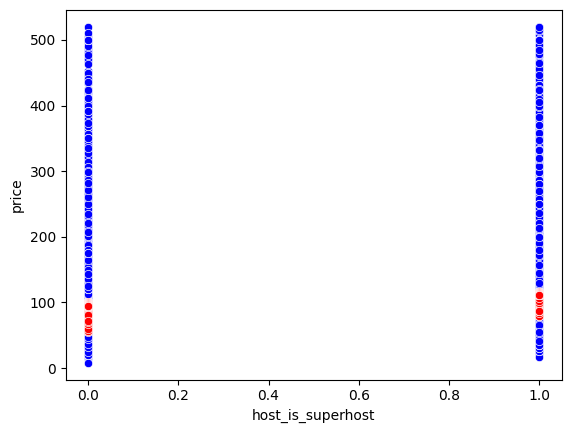

In [36]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)
#sns.lineplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)

In [37]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.026067953786590436

In [38]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.16145573321065573)

**| accommodates vs bathrooms**

In [39]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bathrooms', 'bedrooms','price']]
Var_Dep= df['accommodates']

In [40]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [42]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'bedrooms', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.41924622, 1.32339179, 0.00273004]),
 'rank_': 3,
 'singular_': array([7721.36874826,   74.92491962,   35.45143518]),
 'intercept_': np.float64(1.1319154030566172)}

In [43]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.4774109993012098

In [44]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['bathrooms', 'bedrooms','price']])
y_pred

array([6.41561048, 3.109337  , 1.71496412, ..., 3.03835592, 3.02470571,
       2.98648512], shape=(13001,))

In [45]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(28, 'Predicciones_accommodates_bathrooms', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  review_scores_accuracy  review_scores_cleanliness  \
0      ...                    4.89                       4.85   
1      ...                    4.85                       4.85   
2      ...                    4.92                       4.93   
3      ...                    4.97                       4.91   
4      ...                    4.88                       4.96   
...    ...                     ...                        ...   
12996  ...                    4.90                       4.90   
12997  ...                    4.90                       4.90   
12998  ...                    4.90                       4.90   
12999  ...                    4.90                       4.90   
13000  ...                    4.90                       4.90   

       Predicciones_accommodates_bathrooms  review_scores_communication  \
0                                 6.415610                         4.91   
1                                 3.109337                         4.90   
2                                 1.714964                         4.97   
3                                 3.142098                         4.89   
4                                 3.125717                         4.96   
...                                    ...                          ...   
12996                             4.678433    

<Axes: xlabel='bathrooms', ylabel='accommodates'>

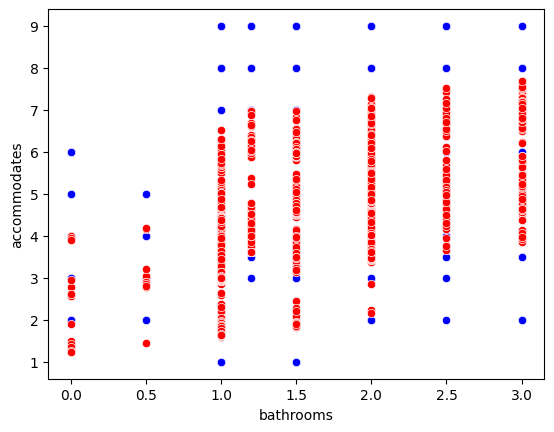

In [46]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)
#sns.lineplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)

In [47]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","accommodates_bathrooms","determinacion")] = coef_Deter
coef_Deter

0.4774109993012098

In [48]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","accommodates_bathrooms","correlacion")] = coef_Correl
coef_Correl

np.float64(0.6909493464076869)

**| price vs review_scores_cleanliness**

In [49]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_cleanliness', 'review_scores_value','host_is_superhost']]
Var_Dep= df['price']

In [50]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [51]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [52]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_value',
        'host_is_superhost'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([40.6433977 ,  4.23281543, 11.69475586]),
 'rank_': 3,
 'singular_': array([56.71037365, 29.85863675, 16.52323651]),
 'intercept_': np.float64(-125.60624549462403)}

In [53]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03129806413191194

In [54]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['review_scores_cleanliness', 'review_scores_value','host_is_superhost']])
y_pred

array([103.31486254, 103.31486254, 106.69331882, ...,  93.86391734,
       105.5586732 , 105.5586732 ], shape=(13001,))

In [55]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  review_scores_cleanliness  Predicciones_accommodates_bathrooms  \
0      ...                       4.85                             6.415610   
1      ...                       4.85                             3.109337   
2      ...                       4.93                             1.714964   
3      ...                       4.91                             3.142098   
4      ...                       4.96                             3.125717   
...    ...                        ...                                  ...   
12996  ...                       4.90                             4.678433   
12997  ...                       4.90                             3.002865   
12998  ...                       4.90                             3.038356   
12999  ...                       4.90                             3.024706   
13000  ...                       4.90                             2.986485   

       review_scores_communication  review_scores_location  \
0                             4.91                    4.58   
1                             4.90                    4.80   
2                             4.97                    4.79   
3                             4.89                    4.82   
4                             4.96                    4.75   
...                            ...         

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

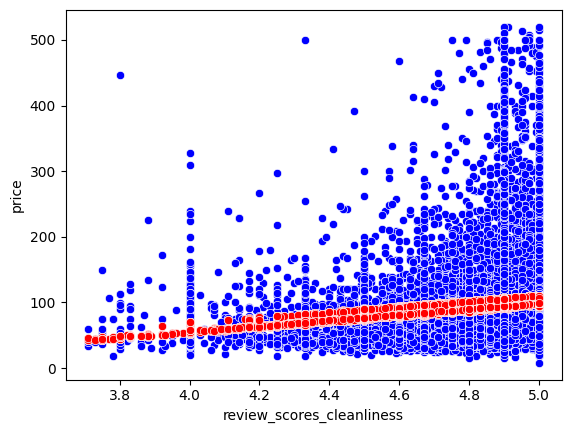

In [56]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.03129806413191194

In [58]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.17691258895825346)

**| price vs host_identity_verified**

In [59]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_identity_verified', 'host_is_superhost','reviews_per_month']]
Var_Dep= df['price']

In [60]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [61]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [62]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified', 'host_is_superhost', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-9.98463192, 18.80199644, -3.12038334]),
 'rank_': 3,
 'singular_': array([180.38015885,  54.03949646,  15.55769146]),
 'intercept_': np.float64(102.47905433948692)}

In [63]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01917266694451547

In [64]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_identity_verified', 'host_is_superhost','reviews_per_month']])
y_pred

array([110.26669236, 109.54900419, 109.01853902, ...,  92.49442242,
       111.29641886, 111.29641886], shape=(13001,))

In [65]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_identity_verified', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  Predicciones_accommodates_bathrooms  review_scores_communication  \
0      ...                             6.415610                         4.91   
1      ...                             3.109337                         4.90   
2      ...                             1.714964                         4.97   
3      ...                             3.142098                         4.89   
4      ...                             3.125717                         4.96   
...    ...                                  ...                          ...   
12996  ...                             4.678433                         5.00   
12997  ...                             3.002865                         5.00   
12998  ...                             3.038356                         5.00   
12999  ...                             3.024706                         5.00   
13000  ...                             2.986485                         5.00   

       review_scores_location  review_scores_value  \
0                        4.58                 4.75   
1                        4.80                 4.75   
2                        4.79                 4.78   
3                        4.82                 4.82   
4                        4.75                 4.71   
...                       ...                  ...   
12996        

<Axes: xlabel='host_identity_verified', ylabel='price'>

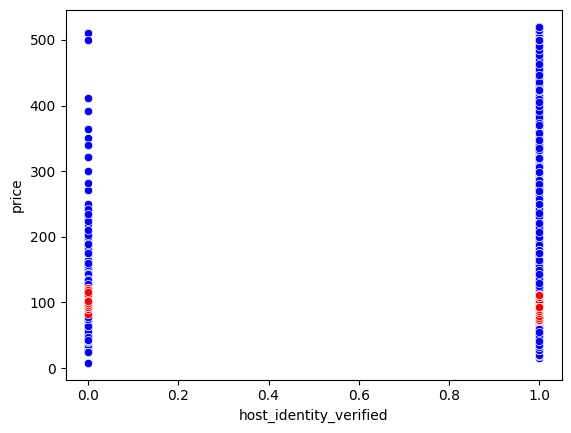

In [66]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.01917266694451547

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.13846539980990005)

**| price vs instant_bookable**

In [69]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['instant_bookable', 'host_acceptance_rate','host_total_listings_count']]
Var_Dep= df['price']

In [70]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [71]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [72]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'host_acceptance_rate',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 6.74260691, 46.51059038,  0.06600632]),
 'rank_': 3,
 'singular_': array([6087.77401557,   52.44318908,    7.25597189]),
 'intercept_': np.float64(43.73149657678405)}

In [73]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.009606269389629607

In [74]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['instant_bookable', 'host_acceptance_rate','host_total_listings_count']])
y_pred

array([97.77676967, 97.77676967, 97.77676967, ..., 97.71076336,
       84.92484138, 84.92484138], shape=(13001,))

In [75]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_instant_bookable', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  review_scores_communication  review_scores_location  \
0      ...                         4.91                    4.58   
1      ...                         4.90                    4.80   
2      ...                         4.97                    4.79   
3      ...                         4.89                    4.82   
4      ...                         4.96                    4.75   
...    ...                          ...                     ...   
12996  ...                         5.00                    4.80   
12997  ...                         5.00                    4.80   
12998  ...                         5.00                    4.80   
12999  ...                         5.00                    4.80   
13000  ...                         5.00                    4.80   

       review_scores_value  Predicciones_price_instant_bookable  \
0                     4.75                            97.776770   
1                     4.75                            97.776770   
2                     4.78                            97.776770   
3                     4.82                            97.776770   
4                     4.71                            97.776770   
...                    ...                                  ...   
12996                 4.80                            97.644757   
12997      

<Axes: xlabel='instant_bookable', ylabel='price'>

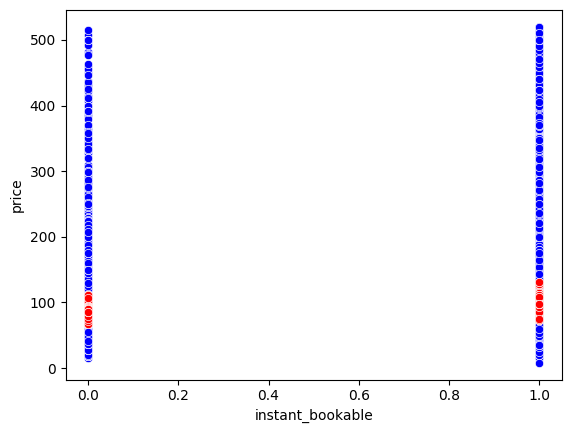

In [76]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.009606269389629607

In [78]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.09801157783460894)

**| price vs property_type**

In [79]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['property_type_encoded', 'host_total_listings_count','host_is_superhost']]
Var_Dep= df['price']

In [80]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [81]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [82]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded', 'host_total_listings_count',
        'host_is_superhost'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.25210648,  0.09664255, 17.88819497]),
 'rank_': 3,
 'singular_': array([6087.87697767,  343.26512177,   55.50168394]),
 'intercept_': np.float64(73.9091839832901)}

In [83]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02339742791717503

In [84]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['property_type_encoded', 'host_total_listings_count','host_is_superhost']])
y_pred

array([ 97.96551551, 106.73026087, 106.73026087, ...,  88.74542334,
       105.95712045, 105.95712045], shape=(13001,))

In [85]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_property_type', y_pred)
df  

host_is_superhost  host_identity_verified  instant_bookable  \
0                      1                       1                 1   
1                      1                       1                 1   
2                      1                       1                 1   
3                      1                       1                 1   
4                      1                       1                 1   
...                  ...                     ...               ...   
12996                  0                       1                 1   
12997                  0                       1                 0   
12998                  0                       1                 1   
12999                  1                       1                 0   
13000                  1                       1                 0   

                        id  host_response_rate  host_acceptance_rate  \
0                    10595                 1.0                  1.00   
1                    10990                 1.0                  1.00   
2                    10993                 1.0                  1.00   
3                    10995                 1.0                  1.00   
4                    27262                 1.0                  1.00   
...                    ...                 ...                   ...   
12996  1249944747704827637                 1.0                  1.00   
12997  1250012048760328092                 1.0                  1.00   
12998  1250050091910224971                 1.0                  1.00   
12999  1250102024274955611                 1.0                  0.88   
13000  1250198708572511328                 1.0                  0.88   

       host_listings_count  host_total_listings_count   latitude  longitude  \
0                     10.0                       12.0  37.988630  23.765270   
1                     10.0                       12.0  37.989030  23.764480   
2                     10.0                       12.0  37.988880  23.764730   
3                     10.0                       12.0  37.989030  23.764480   
4                     10.0                       12.0  37.989240  23.765000   
...                    ...                        ...        ...        ...   
12996                 10.0                       10.0  37.993366  23.732735   
12997                  2.0                        4.0  37.963710  23.719070   
12998                 11.0                       11.0  37.963669  23.747608   
12999                  3.0                        4.0  37.987630  23.725520   
13000                  3.0                        4.0  37.988729  23.723272   

       ...  review_scores_location  review_scores_value  \
0      ...                    4.58                 4.75   
1      ...                    4.80                 4.75   
2      ...                    4.79                 4.78   
3      ...                    4.82                 4.82   
4      ...                    4.75                 4.71   
...    ...                     ...                  ...   
12996  ...                    4.80                 4.80   
12997  ...                    4.80                 4.80   
12998  ...                    4.80                 4.80   
12999  ...                    4.80                 4.80   
13000  ...                    4.80                 4.80   

       Predicciones_price_property_type  Predicciones_price_instant_bookable  \
0                             97.965516                            97.776770   
1                            106.730261                            97.776770   
2                            106.730261                            97.776770   
3                            106.730261                            97.776770   
4                            106.730261                            97.776770   
...                                 ...                                  ...   
12996                         84.892461                            97.644757   
129

<Axes: xlabel='property_type_encoded', ylabel='price'>

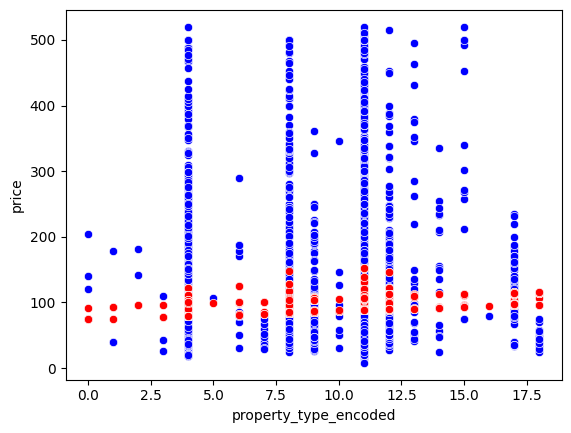

In [86]:
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)

In [87]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Entire_home","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.02339742791717503

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Entire_home","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.15296217806103254)

# Hotel Room

In [89]:
#Cargar desde un archivo .csv
df = pd.read_csv('room_type_Grecia/Hotel_room_Grecia.csv')

df.head()

last_scraped           source  \
0   2024-09-23  previous scrape   
1   2024-09-23      city scrape   
2   2024-09-23      city scrape   
3   2024-09-23      city scrape   
4   2024-09-23      city scrape   

                                                name  \
0  Standard Double Room with private shower & Bal...   
1          Triple Room with private shower & Balcony   
2    Exceptional Penthouse close to Acropolis by GHH   
3          Acropolis Grand Residence, Stunning Views   
4            AcropolisView -Two Bedroom Apt by Meros   

                                         description  \
0  My place is close to restaurants and dining, p...   
1  My place is close to restaurants and dining, p...   
2  This exceptional Penthouse close to the Acropo...   
3  Located in a 1930’s neoclassical building, dir...   
4  The apartment is located at the foothills of A...   

                               neighborhood_overview             host_name  \
0                                      No disponible          Konstantinos   
1                                      No disponible          Konstantinos   
2  A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3  The residence is located at 12 Syggrou avenue ...             Vasileios   
4  Thissio is a traditional neighborhood in downt...                 Meros   

   host_since   host_location  \
0  2016-01-10  Athens, Greece   
1  2016-01-10  Athens, Greece   
2  2015-10-20  Athens, Greece   
3  2017-01-31  Athens, Greece   
4  2015-05-06  Athens, Greece   

                                          host_about host_response_time  ...  \
0                                      No disponible     within an hour  ...   
1                                      No disponible     within an hour  ...   
2  Find your own home in Greece, for holidays or ...     within an hour  ...   
3  We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4  Hi, we are Meros team and we will be your host...     within an hour  ...   

  availability_365 number_of_reviews number_of_reviews_l30d  \
0              320               1.0                    0.0   
1              328               1.0                    0.0   
2              135              84.0                    1.0   
3              292             184.0                    1.0   
4               74             116.0                    5.0   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 4.00                   5.00                      5.00   
1                 5.00                   5.00                      5.00   
2                 4.64                   4.73                      4.73   
3                 4.98                   4.97                      4.97   
4                 4.77                   4.84                      4.88   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   5.00                5.00   
1                        5.00                   5.00                5.00   
2                        4.94                   4.95                4.69   
3                        4.98                   4.99                4.95   
4                        4.79                   4.92                4.79   

  reviews_per_month  
0              0.01  
1              0.03  
2              1.03  
3              2.33  
4              1.48  

[5 rows x 50 columns]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 74 non-null     object 
 1   source                       74 non-null     object 
 2   name                         74 non-null     object 
 3   description                  74 non-null     object 
 4   neighborhood_overview        74 non-null     object 
 5   host_name                    74 non-null     object 
 6   host_since                   74 non-null     object 
 7   host_location                74 non-null     object 
 8   host_about                   74 non-null     object 
 9   host_response_time           74 non-null     object 
 10  host_is_superhost            74 non-null     object 
 11  host_verifications           74 non-null     object 
 12  host_identity_verified       74 non-null     object 
 13  neighbourhood_cleansed

In [91]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    df[var] = df[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [92]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
df["property_type_encoded"] = le.fit_transform(df["property_type"])

In [93]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable"),
    ("price", "property_type_encoded")
]

In [94]:
#eliminamos la columna tipo string
df2 = df.select_dtypes(include=[np.number])

#Encontramos todas las correlaciones entre las variables
corr_Factors = df2.corr()
corr_Factors

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                     NaN   
host_identity_verified                     NaN                     NaN   
instant_bookable                     -0.684435                     NaN   
id                                   -0.120142                     NaN   
host_response_rate                    0.103414                     NaN   
host_acceptance_rate                  0.092089                     NaN   
host_listings_count                   0.856433                     NaN   
host_total_listings_count             0.779562                     NaN   
latitude                             -0.191295                     NaN   
longitude                            -0.099612                     NaN   
accommodates                          0.182031                     NaN   
bathrooms                             0.340263                     NaN   
bedrooms                             -0.215679                     NaN   
beds                                  0.122325                     NaN   
price                                -0.304569                     NaN   
minimum_nights                        0.128806                     NaN   
maximum_nights                       -0.766996                     NaN   
minimum_nights_avg_ntm                0.049812                     NaN   
maximum_nights_avg_ntm               -0.020447                     NaN   
availability_30                       0.359104                     NaN   
availability_60                       0.301524                     NaN   
availability_90                       0.183830                     NaN   
availability_365                      0.169178                     NaN   
number_of_reviews                     0.068745                     NaN   
number_of_reviews_l30d               -0.049744                     NaN   
review_scores_rating                  0.061877                     NaN   
review_scores_accuracy               -0.013928                     NaN   
review_scores_cleanliness             0.159061                     NaN   
review_scores_communication           0.081207                     NaN   
review_scores_location                0.153514                     NaN   
review_scores_value                   0.052065                     NaN   
reviews_per_month                    -0.010089                     NaN   
property_type_encoded                 0.230879                     NaN   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                   -0.684435 -0.120142            0.103414   
host_identity_verified                    NaN       NaN                 NaN   
instant_bookable                     1.000000 -0.099870           -0.103414   
id                                  -0.099870  1.000000           -0.545528   
host_response_rate                  -0.103414 -0.545528            1.000000   
host_acceptance_rate                -0.092089 -0.233761           -0.143439   
host_listings_count                 -0.559267  0.029073            0.094325   
host_total_listings_count           -0.495521  0.066169            0.124268   
latitude                            -0.021774  0.494803           -0.162045   
longitude                            0.110512  0.407492           -0.852533   
accommodates                         0.127236 -0.085916           -0.056148   
bathrooms                            0.089421 -0.322584            0.139283   
bedrooms                             0.372486 -0.296771            0.177387   
beds                                 0.115887 -0.259035            0.183579   
price                                0.240711 -0.039382           -0.217454   
minimum_nights                       0.051036 -0.282357            0.079495   
maximum_nights                       0.616593  0.305789           -0.123015   
minimum_nights_avg_ntm               0.097632 -0.358105            0.152073   
maximum_nig

In [95]:
corr_Factors1 = abs(corr_Factors)
corr_Factors1

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                     NaN   
host_identity_verified                     NaN                     NaN   
instant_bookable                      0.684435                     NaN   
id                                    0.120142                     NaN   
host_response_rate                    0.103414                     NaN   
host_acceptance_rate                  0.092089                     NaN   
host_listings_count                   0.856433                     NaN   
host_total_listings_count             0.779562                     NaN   
latitude                              0.191295                     NaN   
longitude                             0.099612                     NaN   
accommodates                          0.182031                     NaN   
bathrooms                             0.340263                     NaN   
bedrooms                              0.215679                     NaN   
beds                                  0.122325                     NaN   
price                                 0.304569                     NaN   
minimum_nights                        0.128806                     NaN   
maximum_nights                        0.766996                     NaN   
minimum_nights_avg_ntm                0.049812                     NaN   
maximum_nights_avg_ntm                0.020447                     NaN   
availability_30                       0.359104                     NaN   
availability_60                       0.301524                     NaN   
availability_90                       0.183830                     NaN   
availability_365                      0.169178                     NaN   
number_of_reviews                     0.068745                     NaN   
number_of_reviews_l30d                0.049744                     NaN   
review_scores_rating                  0.061877                     NaN   
review_scores_accuracy                0.013928                     NaN   
review_scores_cleanliness             0.159061                     NaN   
review_scores_communication           0.081207                     NaN   
review_scores_location                0.153514                     NaN   
review_scores_value                   0.052065                     NaN   
reviews_per_month                     0.010089                     NaN   
property_type_encoded                 0.230879                     NaN   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                    0.684435  0.120142            0.103414   
host_identity_verified                    NaN       NaN                 NaN   
instant_bookable                     1.000000  0.099870            0.103414   
id                                   0.099870  1.000000            0.545528   
host_response_rate                   0.103414  0.545528            1.000000   
host_acceptance_rate                 0.092089  0.233761            0.143439   
host_listings_count                  0.559267  0.029073            0.094325   
host_total_listings_count            0.495521  0.066169            0.124268   
latitude                             0.021774  0.494803            0.162045   
longitude                            0.110512  0.407492            0.852533   
accommodates                         0.127236  0.085916            0.056148   
bathrooms                            0.089421  0.322584            0.139283   
bedrooms                             0.372486  0.296771            0.177387   
beds                                 0.115887  0.259035            0.183579   
price                                0.240711  0.039382            0.217454   
minimum_nights                       0.051036  0.282357            0.079495   
maximum_nights                       0.616593  0.305789            0.123015   
minimum_nights_avg_ntm               0.097632  0.358105            0.152073   
maximum_nig

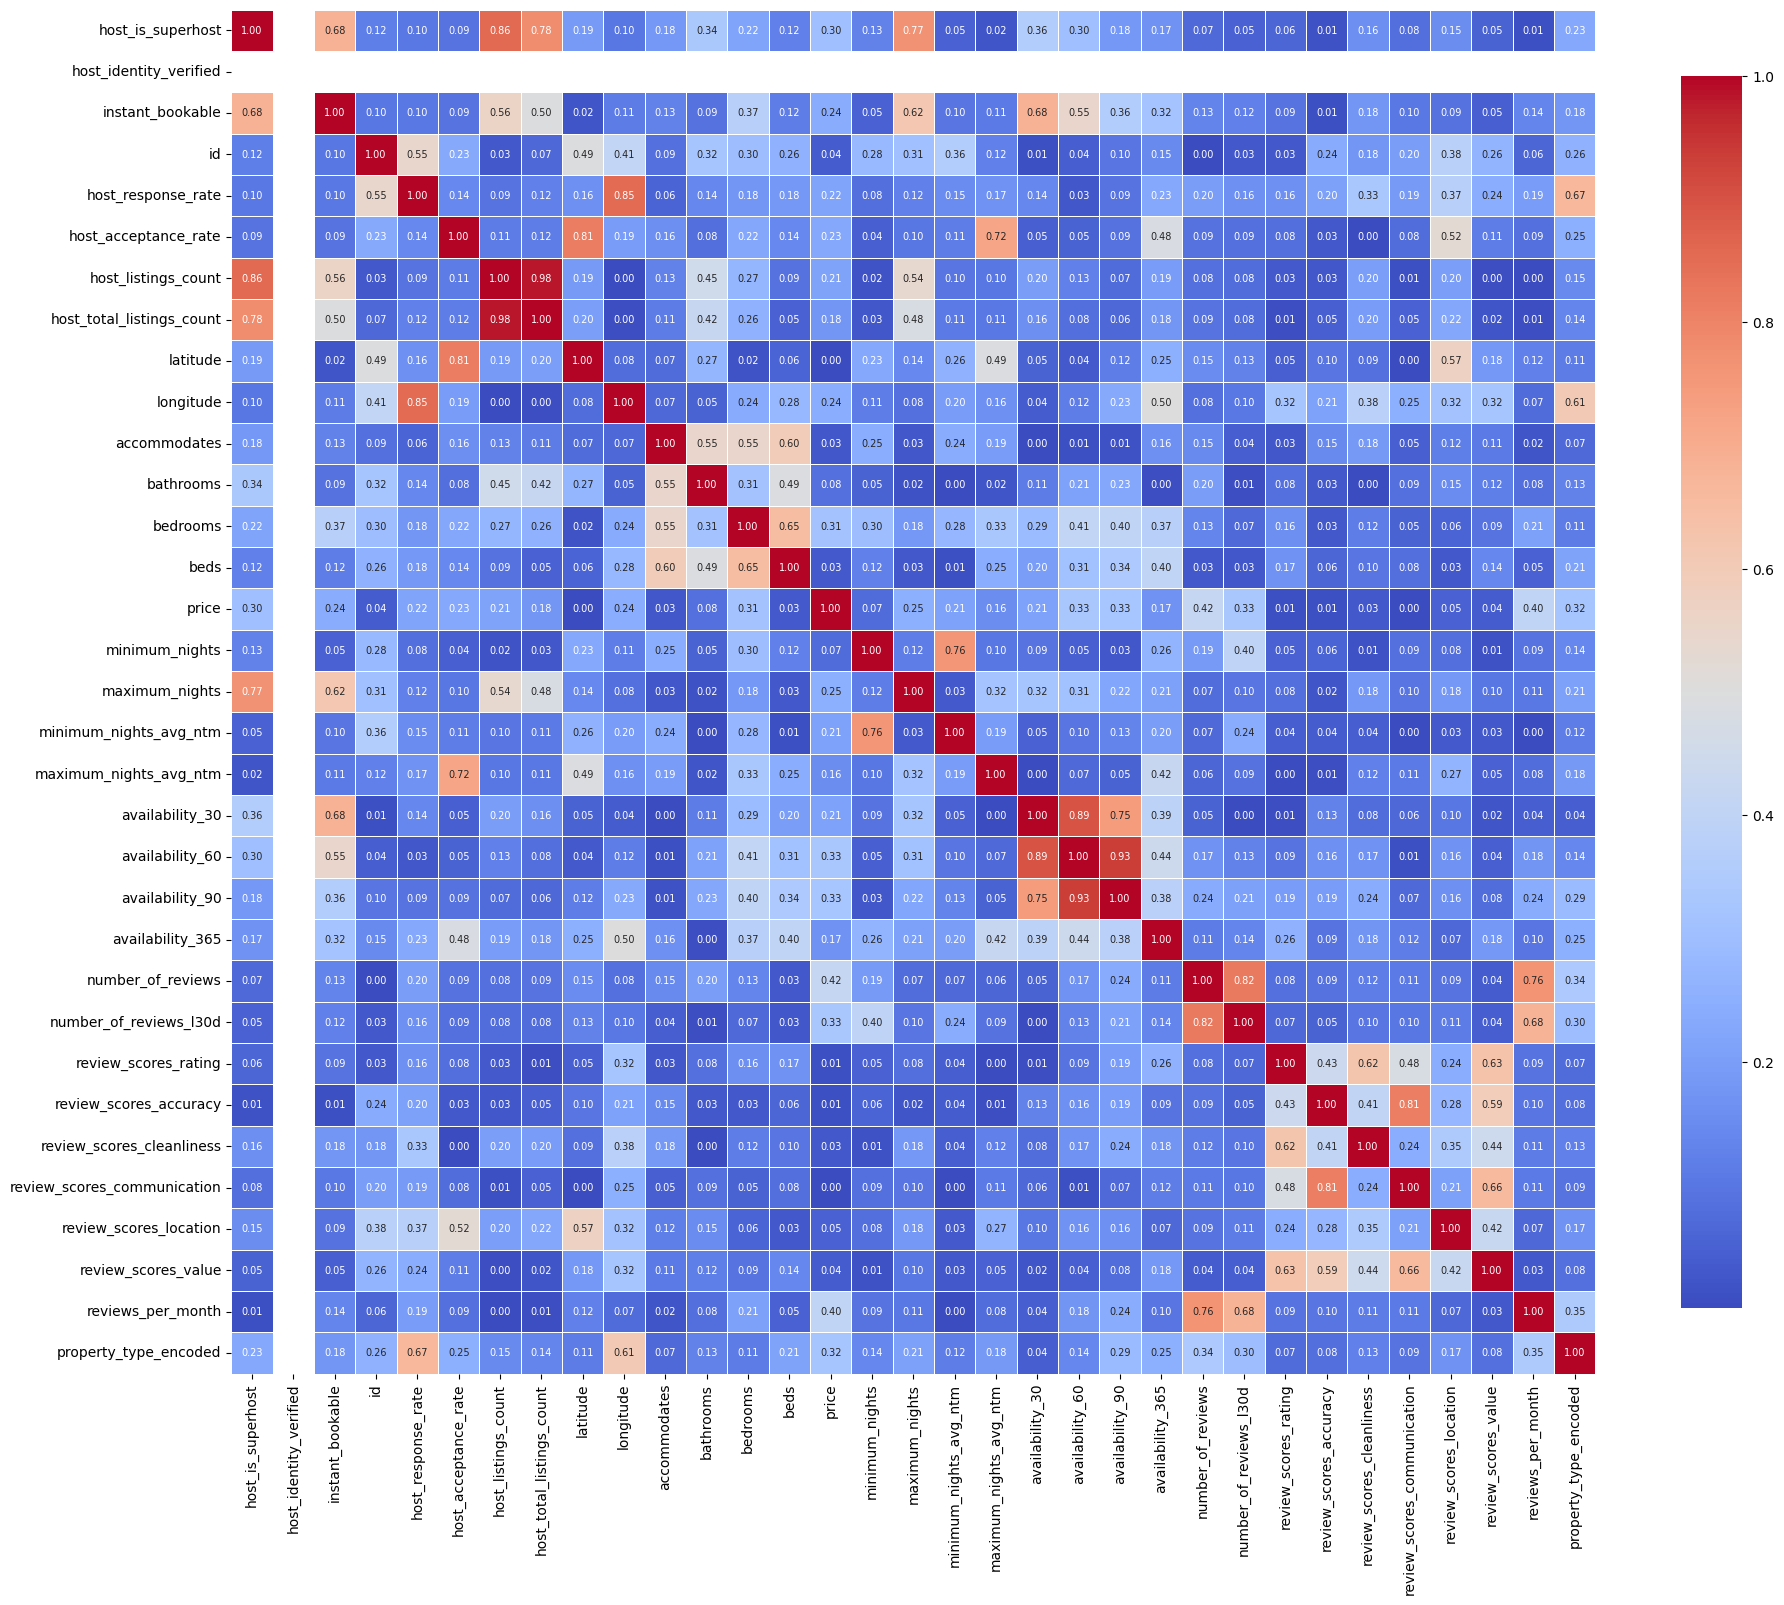

In [96]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(22, 20))

# Crear una máscara para la mitad superior (opcional, si quieres ver solo la parte baja)
mask = np.triu(np.ones_like(corr_Factors1, dtype=bool))

# Crear el mapa de calor con mejoras
heat_map = sns.heatmap(
    corr_Factors1, 
    cmap="coolwarm",   # Mejora la diferenciación entre positivos y negativos
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    square=True,       
    annot_kws={"size": 7},  # Reducimos el tamaño de los números internos
    cbar_kws={"shrink": 0.8}  # Hacemos la barra de colores más compacta
)

# Mejoramos la visibilidad de etiquetas
plt.xticks(rotation=90)  # Rota nombres en X para que no se encimen
plt.yticks(rotation=0)   # Mantiene etiquetas en Y horizontales

# Mostrar el gráfico
plt.show()



In [97]:
variables = [ 
    'host_acceptance_rate', 
    'host_is_superhost', 
    'host_total_listings_count', 
    'room_type', 
    'accommodates', 
    'bedrooms', 
    'price', 
    'review_scores_value', 
    'reviews_per_month' 
]

mejores_variables = {}

for var1, var2 in comparaciones:
    corr_var2 = corr_Factors1[var2].drop([var1, var2]).sort_values(ascending=False)
    
    # Filtrar las variables que están en la lista y tomar las dos primeras
    filtered_vars = [var for var in corr_var2.index if var in variables][:2]
    
    # Solo agregar al diccionario si hay al menos dos variables
    if len(filtered_vars) == 2:
        mejores_variables[(var1, var2)] = {
            var2: filtered_vars
        }

mejores_variables

{('price',
  'host_acceptance_rate'): {'host_acceptance_rate': ['bedrooms',
   'accommodates']},
 ('price',
  'host_is_superhost'): {'host_is_superhost': ['host_total_listings_count',
   'bedrooms']},
 ('accommodates',
  'bathrooms'): {'bathrooms': ['host_total_listings_count',
   'host_is_superhost']},
 ('price',
  'review_scores_cleanliness'): {'review_scores_cleanliness': ['review_scores_value',
   'host_total_listings_count']},
 ('price',
  'host_identity_verified'): {'host_identity_verified': ['host_is_superhost',
   'host_acceptance_rate']},
 ('price',
  'instant_bookable'): {'instant_bookable': ['host_is_superhost',
   'host_total_listings_count']},
 ('price',
  'property_type_encoded'): {'property_type_encoded': ['reviews_per_month',
   'host_acceptance_rate']}}

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

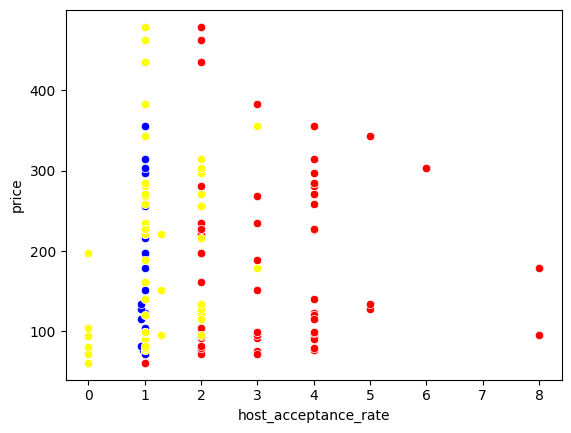

In [98]:
#Imprimimos el scater plot entre la variable dependiente e independientes 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='accommodates', y='price', color="red", data=df)
sns.scatterplot(x='bedrooms', y='price', color="yellow", data=df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

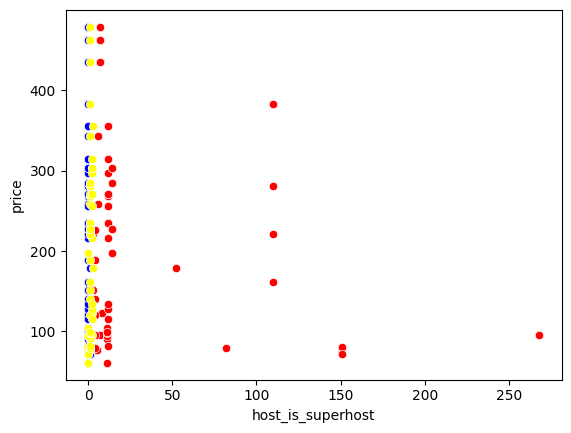

In [99]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="red", data=df)
sns.scatterplot(x='bedrooms', y='price', color="yellow", data=df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

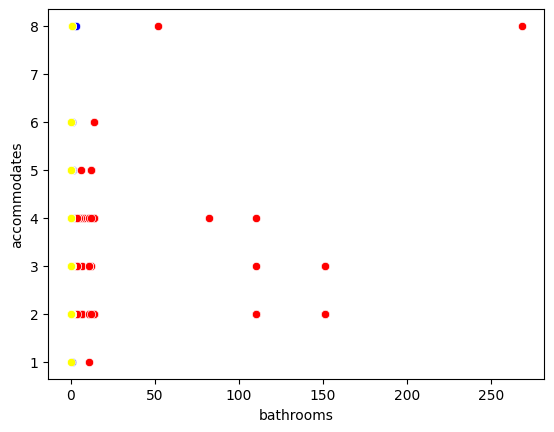

In [100]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='accommodates', color="red", data=df)
sns.scatterplot(x='host_is_superhost', y='accommodates', color="yellow", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

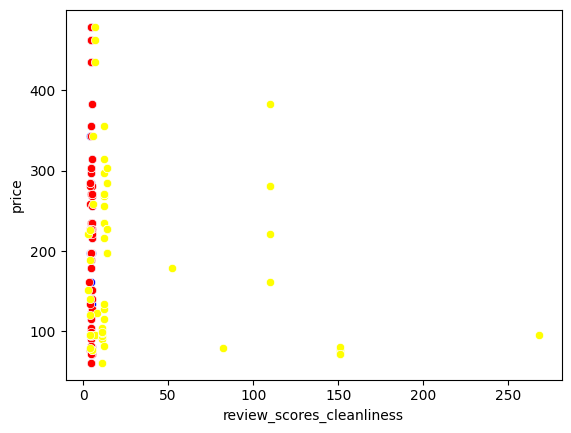

In [101]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_value', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

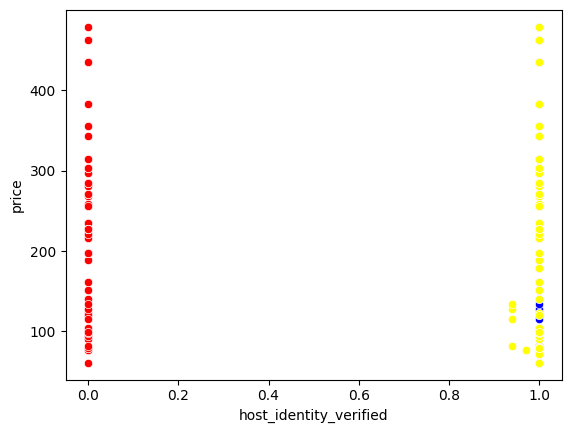

In [102]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

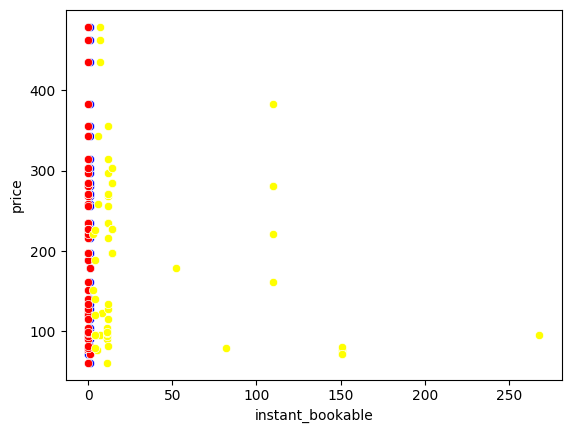

In [103]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='property_type_encoded', ylabel='price'>

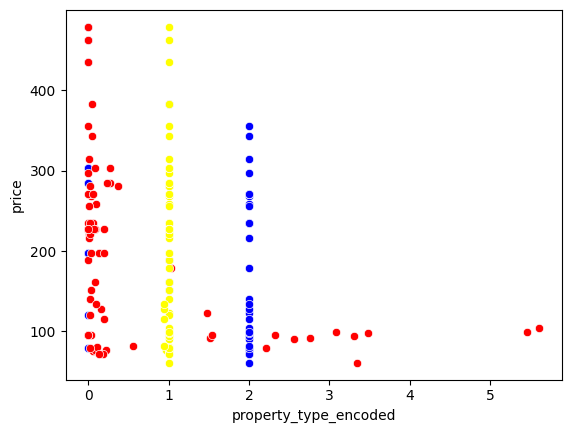

In [104]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)


**| price vs host_acceptance_rate**

In [105]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_acceptance_rate', 'accommodates','bedrooms']]
Var_Dep= df['price']

In [106]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [107]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [108]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([2188.12759647,  -14.55922631,   73.11990557]),
 'rank_': 3,
 'singular_': array([12.07725425,  4.65917129,  0.119158  ]),
 'intercept_': np.float64(-2021.3236499278253)}

In [109]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.21886412377641562

In [110]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_acceptance_rate', 'accommodates','bedrooms']])
y_pred

array([232.74137116, 218.18214485, 269.68985276, 145.38601329,
       254.80685244, 181.68694687, 210.80539949, 181.68694687,
       210.80539949, 210.80539949, 210.80539949, 210.80539949,
       196.24617318, 181.68694687, 167.12772055, 254.80685244,
       196.24617318, 210.80539949, 210.80539949, 196.24617318,
       210.80539949, 254.80685244, 254.80685244, 283.92530506,
       283.92530506, 254.80685244, 327.92675801, 269.36607875,
       116.04311897, 116.04311897, 123.12626761, 137.68549392,
       123.12626761, 137.68549392, 137.68549392, 196.24617318,
       210.80539949, 181.68694687, 123.12626761, 137.68549392,
       181.68694687, 196.24617318, 137.68549392, 181.68694687,
       181.68694687, 181.68694687, 210.80539949, 181.68694687,
       152.24472023, 196.24617318, 181.68694687, 196.24617318,
       181.68694687, 210.80539949, 210.80539949, 210.80539949,
       137.68549392, 181.68694687, 181.68694687, 137.68549392,
       181.68694687, 225.68839981, 181.68694687, 137.68

In [111]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_acceptance_rate', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

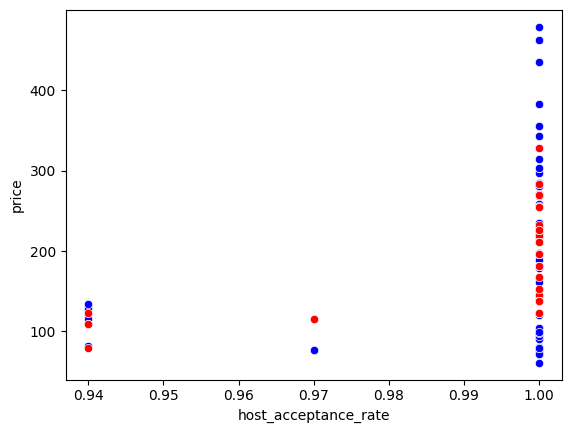

In [112]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)

In [113]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.21886412377641562

In [114]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","price_host_acceptance_rate","correlacion")] = coef_Correl
coef_Correl

np.float64(0.46782916088719356)

**| price vs host_is_superhost**

In [115]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'host_total_listings_count','bedrooms']]
Var_Dep= df['price']

In [116]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [117]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [118]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'host_total_listings_count', 'bedrooms'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-140.80791448,    0.41675169,   41.78118757]),
 'rank_': 3,
 'singular_': array([436.32521385,   5.63281063,   1.57613539]),
 'intercept_': np.float64(144.42688896884033)}

In [119]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.17415123805065846

In [120]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_is_superhost', 'host_total_listings_count','bedrooms']])
y_pred

array([199.99268789, 199.99268789, 150.63362533, 169.62397256,
       231.32327766, 187.87508332, 187.87508332, 187.87508332,
       189.1253384 , 189.1253384 , 189.1253384 , 189.1253384 ,
       189.1253384 , 188.70858671, 188.70858671, 232.99028444,
       191.20909687, 191.20909687, 191.20909687, 191.20909687,
       191.20909687, 232.99028444, 232.99028444, 232.99028444,
       232.99028444, 232.99028444, 274.77147201, 229.65627088,
       188.29183501, 188.29183501,  66.54848042,  66.54848042,
        66.54848042,  66.54848042,  66.54848042, 190.79234518,
       190.79234518, 190.79234518, 149.01115761, 149.01115761,
       190.79234518, 190.79234518, 149.01115761, 190.79234518,
       187.87508332, 187.87508332, 187.87508332, 220.38171552,
       149.01115761, 187.87508332, 187.87508332, 232.05076298,
       232.05076298, 232.05076298, 232.05076298, 232.05076298,
       150.2614127 , 192.04260026, 192.04260026, 150.2614127 ,
       192.04260026, 233.82378783, 192.04260026, 150.26

In [121]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_is_superhost', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_is_superhost', ylabel='price'>

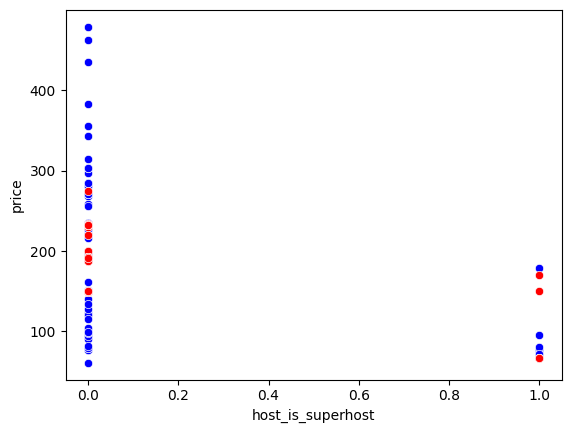

In [122]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)
#sns.lineplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)

In [123]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.17415123805065846

In [124]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4173143156550689)

**| accommodates vs bathrooms**

In [125]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bathrooms', 'host_total_listings_count','host_is_superhost']]
Var_Dep= df['accommodates']

In [126]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [127]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [128]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'host_total_listings_count', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.02475288, -0.00820822,  0.99999163]),
 'rank_': 3,
 'singular_': array([436.32374896,   2.09848211,   1.57579775]),
 'intercept_': np.float64(0.15553540650562425)}

In [129]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.33630975637212

In [130]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['bathrooms', 'host_total_listings_count','host_is_superhost']])
y_pred

array([3.15566362, 3.15566362, 5.26582867, 8.02998144, 3.11462249,
       3.14745539, 3.14745539, 3.14745539, 3.12283072, 3.12283072,
       3.12283072, 3.12283072, 3.12283072, 3.13103894, 4.64341538,
       4.59416603, 3.08178959, 3.08178959, 3.08178959, 3.08178959,
       3.08178959, 4.59416603, 4.59416603, 3.08178959, 3.08178959,
       4.59416603, 4.59416603, 3.14745539, 3.13924717, 3.13924717,
       2.94083798, 2.94083798, 2.94083798, 2.94083798, 2.94083798,
       3.08999782, 3.08999782, 3.08999782, 3.08999782, 3.08999782,
       3.08999782, 3.08999782, 3.08999782, 3.08999782, 3.14745539,
       3.14745539, 3.14745539, 2.50721386, 3.08999782, 3.14745539,
       3.14745539, 2.27738356, 2.27738356, 2.27738356, 2.27738356,
       2.27738356, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.06537314, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.06537314, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.08178959, 3.08178959, 3.08178959, 3.08178959])

In [131]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(28, 'Predicciones_accommodates_bathrooms', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='bathrooms', ylabel='accommodates'>

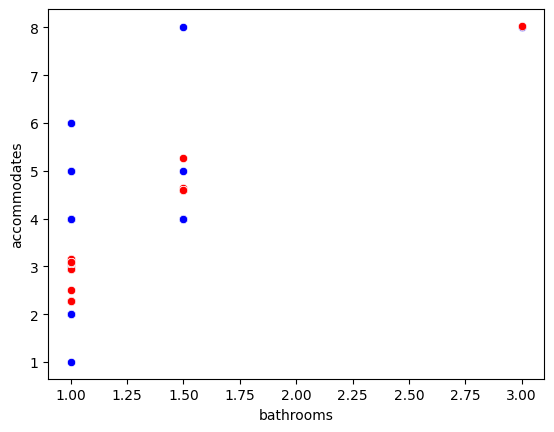

In [132]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)
#sns.lineplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)

In [133]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","accommodates_bathrooms","determinacion")] = coef_Deter
coef_Deter

0.33630975637212

In [134]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","accommodates_bathrooms","correlacion")] = coef_Correl
coef_Correl

np.float64(0.5799221985509091)

**| price vs review_scores_cleanliness**

In [135]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_cleanliness', 'review_scores_value','host_total_listings_count']]
Var_Dep= df['price']

In [136]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [137]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [138]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_value',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 14.23041153, -19.91790752,  -0.37397956]),
 'rank_': 3,
 'singular_': array([436.31841836,   2.6957298 ,   1.51457143]),
 'intercept_': np.float64(225.58575065478897)}

In [139]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03494771001366159

In [140]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['review_scores_cleanliness', 'review_scores_value','host_total_listings_count']])
y_pred

array([196.02633205, 196.02633205, 180.03367363,  97.49073063,
       196.63154543, 198.21289284, 198.21289284, 198.21289284,
       194.5304138 , 197.09095415, 197.09095415, 197.09095415,
       197.09095415, 217.61080793, 190.63293559, 195.22105633,
       192.66051598, 192.66051598, 199.23342546, 195.22105633,
       192.66051598, 195.22105633, 192.66051598, 192.66051598,
       192.66051598, 192.66051598, 195.22105633, 198.21289284,
       200.94034932, 200.96586891, 145.65683346, 147.25026607,
       140.67735659, 146.45354977, 147.25026607, 195.59480246,
       194.14344054, 195.11078172, 195.36706919, 196.98882255,
       194.7412112 , 194.99726523, 194.57035289, 193.1192244 ,
       195.65235249, 195.65235249, 195.65235249, 167.3343706 ,
       193.40336577, 198.21289284, 198.21289284, 156.01051871,
       156.01051871, 177.35030022, 156.01051871, 175.92842622,
       197.68875003, 193.33443084, 193.33443084, 181.66572682,
       202.41147258, 197.03363755, 205.68213292, 196.35

In [141]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

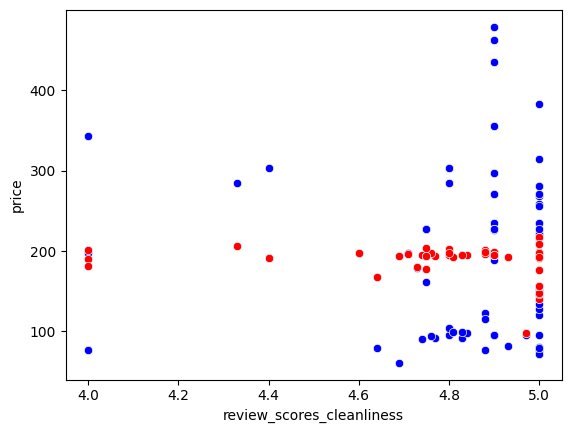

In [142]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)

In [143]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.03494771001366159

In [144]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.18694306623585052)

**| price vs host_identity_verified**

In [145]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_identity_verified', 'host_is_superhost','host_acceptance_rate']]
Var_Dep= df['price']

In [146]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [147]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [148]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified', 'host_is_superhost',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([   0.        , -113.60578662, 1842.43520193]),
 'rank_': 2,
 'singular_': array([2.51753157, 0.12188691, 0.        ]),
 'intercept_': np.float64(-1635.5437010247126)}

In [149]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15926163597484266

In [150]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_identity_verified', 'host_is_superhost','host_acceptance_rate']])
y_pred

array([206.8915009 , 206.8915009 ,  93.28571429,  93.28571429,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       151.61844485, 151.61844485,  93.28571429,  93.28571429,
        93.28571429,  93.28571429,  93.28571429, 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.89

In [151]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_identity_verified', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_identity_verified', ylabel='price'>

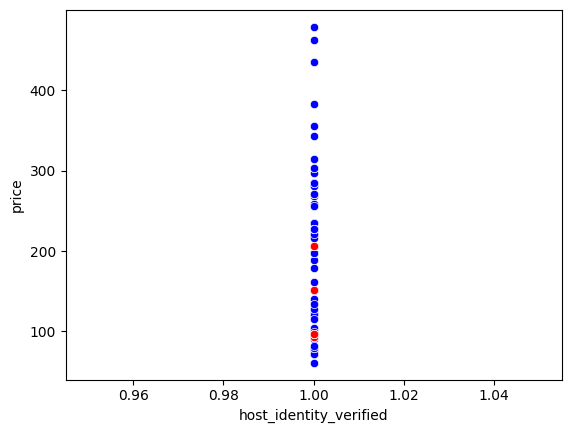

In [152]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)

In [153]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.15926163597484266

In [154]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.39907597769703285)

**| price vs instant_bookable**

In [155]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['instant_bookable', 'host_is_superhost','host_total_listings_count']]
Var_Dep= df['price']

In [156]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [157]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [158]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'host_is_superhost',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([  17.48613463, -131.55643149,    0.2825019 ]),
 'rank_': 3,
 'singular_': array([436.32445447,   2.41756939,   1.19293113]),
 'intercept_': np.float64(176.46188649750945)}

In [159]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.10252363634227613

In [160]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['instant_bookable', 'host_is_superhost','host_total_listings_count']])
y_pred

array([194.79552683, 194.79552683,  77.08168859, 138.10209963,
       196.20803635, 195.07802874, 195.07802874, 195.07802874,
       195.92553444, 195.92553444, 195.92553444, 195.92553444,
       195.92553444, 195.64303254, 195.64303254, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 195.07802874,
       195.36053064, 195.36053064,  87.56324236,  87.56324236,
        87.56324236,  87.56324236,  87.56324236, 197.05554206,
       197.05554206, 197.05554206, 197.05554206, 197.05554206,
       197.05554206, 197.05554206, 197.05554206, 197.05554206,
       195.07802874, 195.07802874, 195.07802874, 217.11317717,
       197.05554206, 177.59189411, 177.59189411, 225.02323045,
       225.02323045, 225.02323045, 225.02323045, 225.02323045,
       197.90304777, 197.90304777, 197.90304777, 197.90304777,
       197.90304777, 197.90304777, 197.90304777, 197.90

In [161]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_instant_bookable', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='instant_bookable', ylabel='price'>

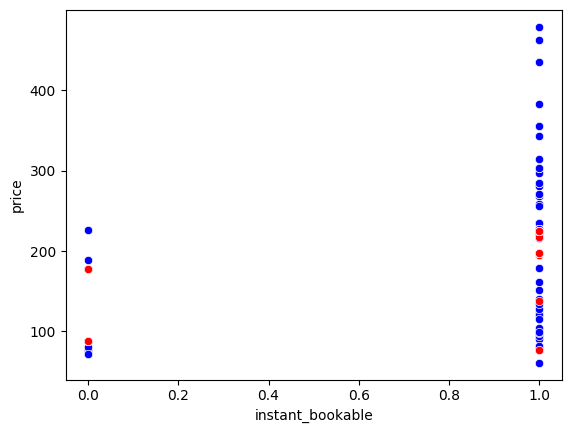

In [162]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)

In [163]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.10252363634227613

In [164]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.3201931235087289)

**| price vs property_type**

In [165]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['property_type_encoded', 'reviews_per_month','host_acceptance_rate']]
Var_Dep= df['price']

In [166]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [167]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [168]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded', 'reviews_per_month',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ -16.16453545,  -30.50564602, 1602.26783125]),
 'rank_': 3,
 'singular_': array([11.10244826,  6.75285592,  0.11639776]),
 'intercept_': np.float64(-1368.8779762849101)}

In [169]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2449913111643761

In [170]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['property_type_encoded', 'reviews_per_month','host_acceptance_rate']])
y_pred

array([216.92026305, 216.31015013, 169.63996865, 146.14716427,
       155.91242794, 217.22531951, 217.22531951, 217.22531951,
       232.16962912, 233.38985496, 233.38985496, 233.38985496,
       233.38985496, 198.01021945, 199.53550176, 201.06078406,
       199.84055822, 200.45067114, 199.2304453 , 201.06078406,
       200.45067114, 201.06078406, 199.2304453 , 200.7557276 ,
       200.7557276 , 200.7557276 , 201.06078406, 233.38985496,
       146.28150699, 150.55229744, 199.2304453 , 198.31527591,
       195.56976777, 197.70516299, 196.78999361, 116.86520103,
       154.6922021 , 122.96633024, 154.08208918, 100.08709572,
        94.90113589,  34.49995677,  29.92410986, 107.1033943 ,
       232.77974204, 200.45067114, 232.77974204, 133.64330634,
        98.86686988, 217.22531951, 217.22531951, 215.70003721,
       216.61520659, 214.78486783, 216.61520659, 205.93823048,
       229.42412098, 230.64434682, 227.28872576, 232.47468558,
       225.15333053, 225.15333053, 226.06849992, 229.11

In [171]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_property_type', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='property_type_encoded', ylabel='price'>

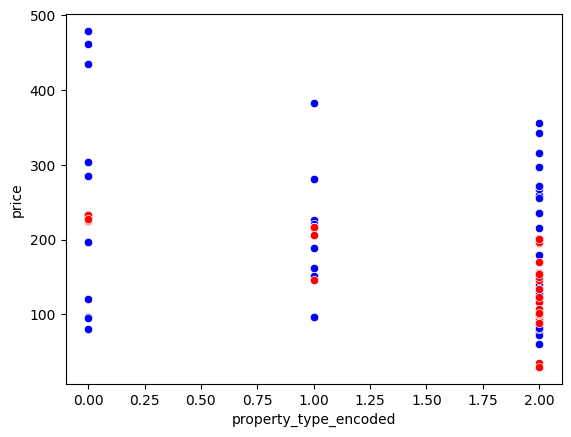

In [172]:
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)

In [173]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Hotel_room","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.2449913111643761

In [174]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Hotel_room","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4949659697033485)

# Private Room

In [175]:
#Cargar desde un archivo .csv
df = pd.read_csv('room_type_Grecia/Hotel_room_Grecia.csv')

df.head()

last_scraped           source  \
0   2024-09-23  previous scrape   
1   2024-09-23      city scrape   
2   2024-09-23      city scrape   
3   2024-09-23      city scrape   
4   2024-09-23      city scrape   

                                                name  \
0  Standard Double Room with private shower & Bal...   
1          Triple Room with private shower & Balcony   
2    Exceptional Penthouse close to Acropolis by GHH   
3          Acropolis Grand Residence, Stunning Views   
4            AcropolisView -Two Bedroom Apt by Meros   

                                         description  \
0  My place is close to restaurants and dining, p...   
1  My place is close to restaurants and dining, p...   
2  This exceptional Penthouse close to the Acropo...   
3  Located in a 1930’s neoclassical building, dir...   
4  The apartment is located at the foothills of A...   

                               neighborhood_overview             host_name  \
0                                      No disponible          Konstantinos   
1                                      No disponible          Konstantinos   
2  A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3  The residence is located at 12 Syggrou avenue ...             Vasileios   
4  Thissio is a traditional neighborhood in downt...                 Meros   

   host_since   host_location  \
0  2016-01-10  Athens, Greece   
1  2016-01-10  Athens, Greece   
2  2015-10-20  Athens, Greece   
3  2017-01-31  Athens, Greece   
4  2015-05-06  Athens, Greece   

                                          host_about host_response_time  ...  \
0                                      No disponible     within an hour  ...   
1                                      No disponible     within an hour  ...   
2  Find your own home in Greece, for holidays or ...     within an hour  ...   
3  We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4  Hi, we are Meros team and we will be your host...     within an hour  ...   

  availability_365 number_of_reviews number_of_reviews_l30d  \
0              320               1.0                    0.0   
1              328               1.0                    0.0   
2              135              84.0                    1.0   
3              292             184.0                    1.0   
4               74             116.0                    5.0   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 4.00                   5.00                      5.00   
1                 5.00                   5.00                      5.00   
2                 4.64                   4.73                      4.73   
3                 4.98                   4.97                      4.97   
4                 4.77                   4.84                      4.88   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   5.00                5.00   
1                        5.00                   5.00                5.00   
2                        4.94                   4.95                4.69   
3                        4.98                   4.99                4.95   
4                        4.79                   4.92                4.79   

  reviews_per_month  
0              0.01  
1              0.03  
2              1.03  
3              2.33  
4              1.48  

[5 rows x 50 columns]

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 74 non-null     object 
 1   source                       74 non-null     object 
 2   name                         74 non-null     object 
 3   description                  74 non-null     object 
 4   neighborhood_overview        74 non-null     object 
 5   host_name                    74 non-null     object 
 6   host_since                   74 non-null     object 
 7   host_location                74 non-null     object 
 8   host_about                   74 non-null     object 
 9   host_response_time           74 non-null     object 
 10  host_is_superhost            74 non-null     object 
 11  host_verifications           74 non-null     object 
 12  host_identity_verified       74 non-null     object 
 13  neighbourhood_cleansed

In [177]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    df[var] = df[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [178]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
df["property_type_encoded"] = le.fit_transform(df["property_type"])

In [179]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable"),
    ("price", "property_type_encoded")
]

In [180]:
#eliminamos la columna tipo string
df2 = df.select_dtypes(include=[np.number])

#Encontramos todas las correlaciones entre las variables
corr_Factors = df2.corr()
corr_Factors

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                     NaN   
host_identity_verified                     NaN                     NaN   
instant_bookable                     -0.684435                     NaN   
id                                   -0.120142                     NaN   
host_response_rate                    0.103414                     NaN   
host_acceptance_rate                  0.092089                     NaN   
host_listings_count                   0.856433                     NaN   
host_total_listings_count             0.779562                     NaN   
latitude                             -0.191295                     NaN   
longitude                            -0.099612                     NaN   
accommodates                          0.182031                     NaN   
bathrooms                             0.340263                     NaN   
bedrooms                             -0.215679                     NaN   
beds                                  0.122325                     NaN   
price                                -0.304569                     NaN   
minimum_nights                        0.128806                     NaN   
maximum_nights                       -0.766996                     NaN   
minimum_nights_avg_ntm                0.049812                     NaN   
maximum_nights_avg_ntm               -0.020447                     NaN   
availability_30                       0.359104                     NaN   
availability_60                       0.301524                     NaN   
availability_90                       0.183830                     NaN   
availability_365                      0.169178                     NaN   
number_of_reviews                     0.068745                     NaN   
number_of_reviews_l30d               -0.049744                     NaN   
review_scores_rating                  0.061877                     NaN   
review_scores_accuracy               -0.013928                     NaN   
review_scores_cleanliness             0.159061                     NaN   
review_scores_communication           0.081207                     NaN   
review_scores_location                0.153514                     NaN   
review_scores_value                   0.052065                     NaN   
reviews_per_month                    -0.010089                     NaN   
property_type_encoded                 0.230879                     NaN   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                   -0.684435 -0.120142            0.103414   
host_identity_verified                    NaN       NaN                 NaN   
instant_bookable                     1.000000 -0.099870           -0.103414   
id                                  -0.099870  1.000000           -0.545528   
host_response_rate                  -0.103414 -0.545528            1.000000   
host_acceptance_rate                -0.092089 -0.233761           -0.143439   
host_listings_count                 -0.559267  0.029073            0.094325   
host_total_listings_count           -0.495521  0.066169            0.124268   
latitude                            -0.021774  0.494803           -0.162045   
longitude                            0.110512  0.407492           -0.852533   
accommodates                         0.127236 -0.085916           -0.056148   
bathrooms                            0.089421 -0.322584            0.139283   
bedrooms                             0.372486 -0.296771            0.177387   
beds                                 0.115887 -0.259035            0.183579   
price                                0.240711 -0.039382           -0.217454   
minimum_nights                       0.051036 -0.282357            0.079495   
maximum_nights                       0.616593  0.305789           -0.123015   
minimum_nights_avg_ntm               0.097632 -0.358105            0.152073   
maximum_nig

In [181]:
corr_Factors1 = abs(corr_Factors)
corr_Factors1

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                     NaN   
host_identity_verified                     NaN                     NaN   
instant_bookable                      0.684435                     NaN   
id                                    0.120142                     NaN   
host_response_rate                    0.103414                     NaN   
host_acceptance_rate                  0.092089                     NaN   
host_listings_count                   0.856433                     NaN   
host_total_listings_count             0.779562                     NaN   
latitude                              0.191295                     NaN   
longitude                             0.099612                     NaN   
accommodates                          0.182031                     NaN   
bathrooms                             0.340263                     NaN   
bedrooms                              0.215679                     NaN   
beds                                  0.122325                     NaN   
price                                 0.304569                     NaN   
minimum_nights                        0.128806                     NaN   
maximum_nights                        0.766996                     NaN   
minimum_nights_avg_ntm                0.049812                     NaN   
maximum_nights_avg_ntm                0.020447                     NaN   
availability_30                       0.359104                     NaN   
availability_60                       0.301524                     NaN   
availability_90                       0.183830                     NaN   
availability_365                      0.169178                     NaN   
number_of_reviews                     0.068745                     NaN   
number_of_reviews_l30d                0.049744                     NaN   
review_scores_rating                  0.061877                     NaN   
review_scores_accuracy                0.013928                     NaN   
review_scores_cleanliness             0.159061                     NaN   
review_scores_communication           0.081207                     NaN   
review_scores_location                0.153514                     NaN   
review_scores_value                   0.052065                     NaN   
reviews_per_month                     0.010089                     NaN   
property_type_encoded                 0.230879                     NaN   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                    0.684435  0.120142            0.103414   
host_identity_verified                    NaN       NaN                 NaN   
instant_bookable                     1.000000  0.099870            0.103414   
id                                   0.099870  1.000000            0.545528   
host_response_rate                   0.103414  0.545528            1.000000   
host_acceptance_rate                 0.092089  0.233761            0.143439   
host_listings_count                  0.559267  0.029073            0.094325   
host_total_listings_count            0.495521  0.066169            0.124268   
latitude                             0.021774  0.494803            0.162045   
longitude                            0.110512  0.407492            0.852533   
accommodates                         0.127236  0.085916            0.056148   
bathrooms                            0.089421  0.322584            0.139283   
bedrooms                             0.372486  0.296771            0.177387   
beds                                 0.115887  0.259035            0.183579   
price                                0.240711  0.039382            0.217454   
minimum_nights                       0.051036  0.282357            0.079495   
maximum_nights                       0.616593  0.305789            0.123015   
minimum_nights_avg_ntm               0.097632  0.358105            0.152073   
maximum_nig

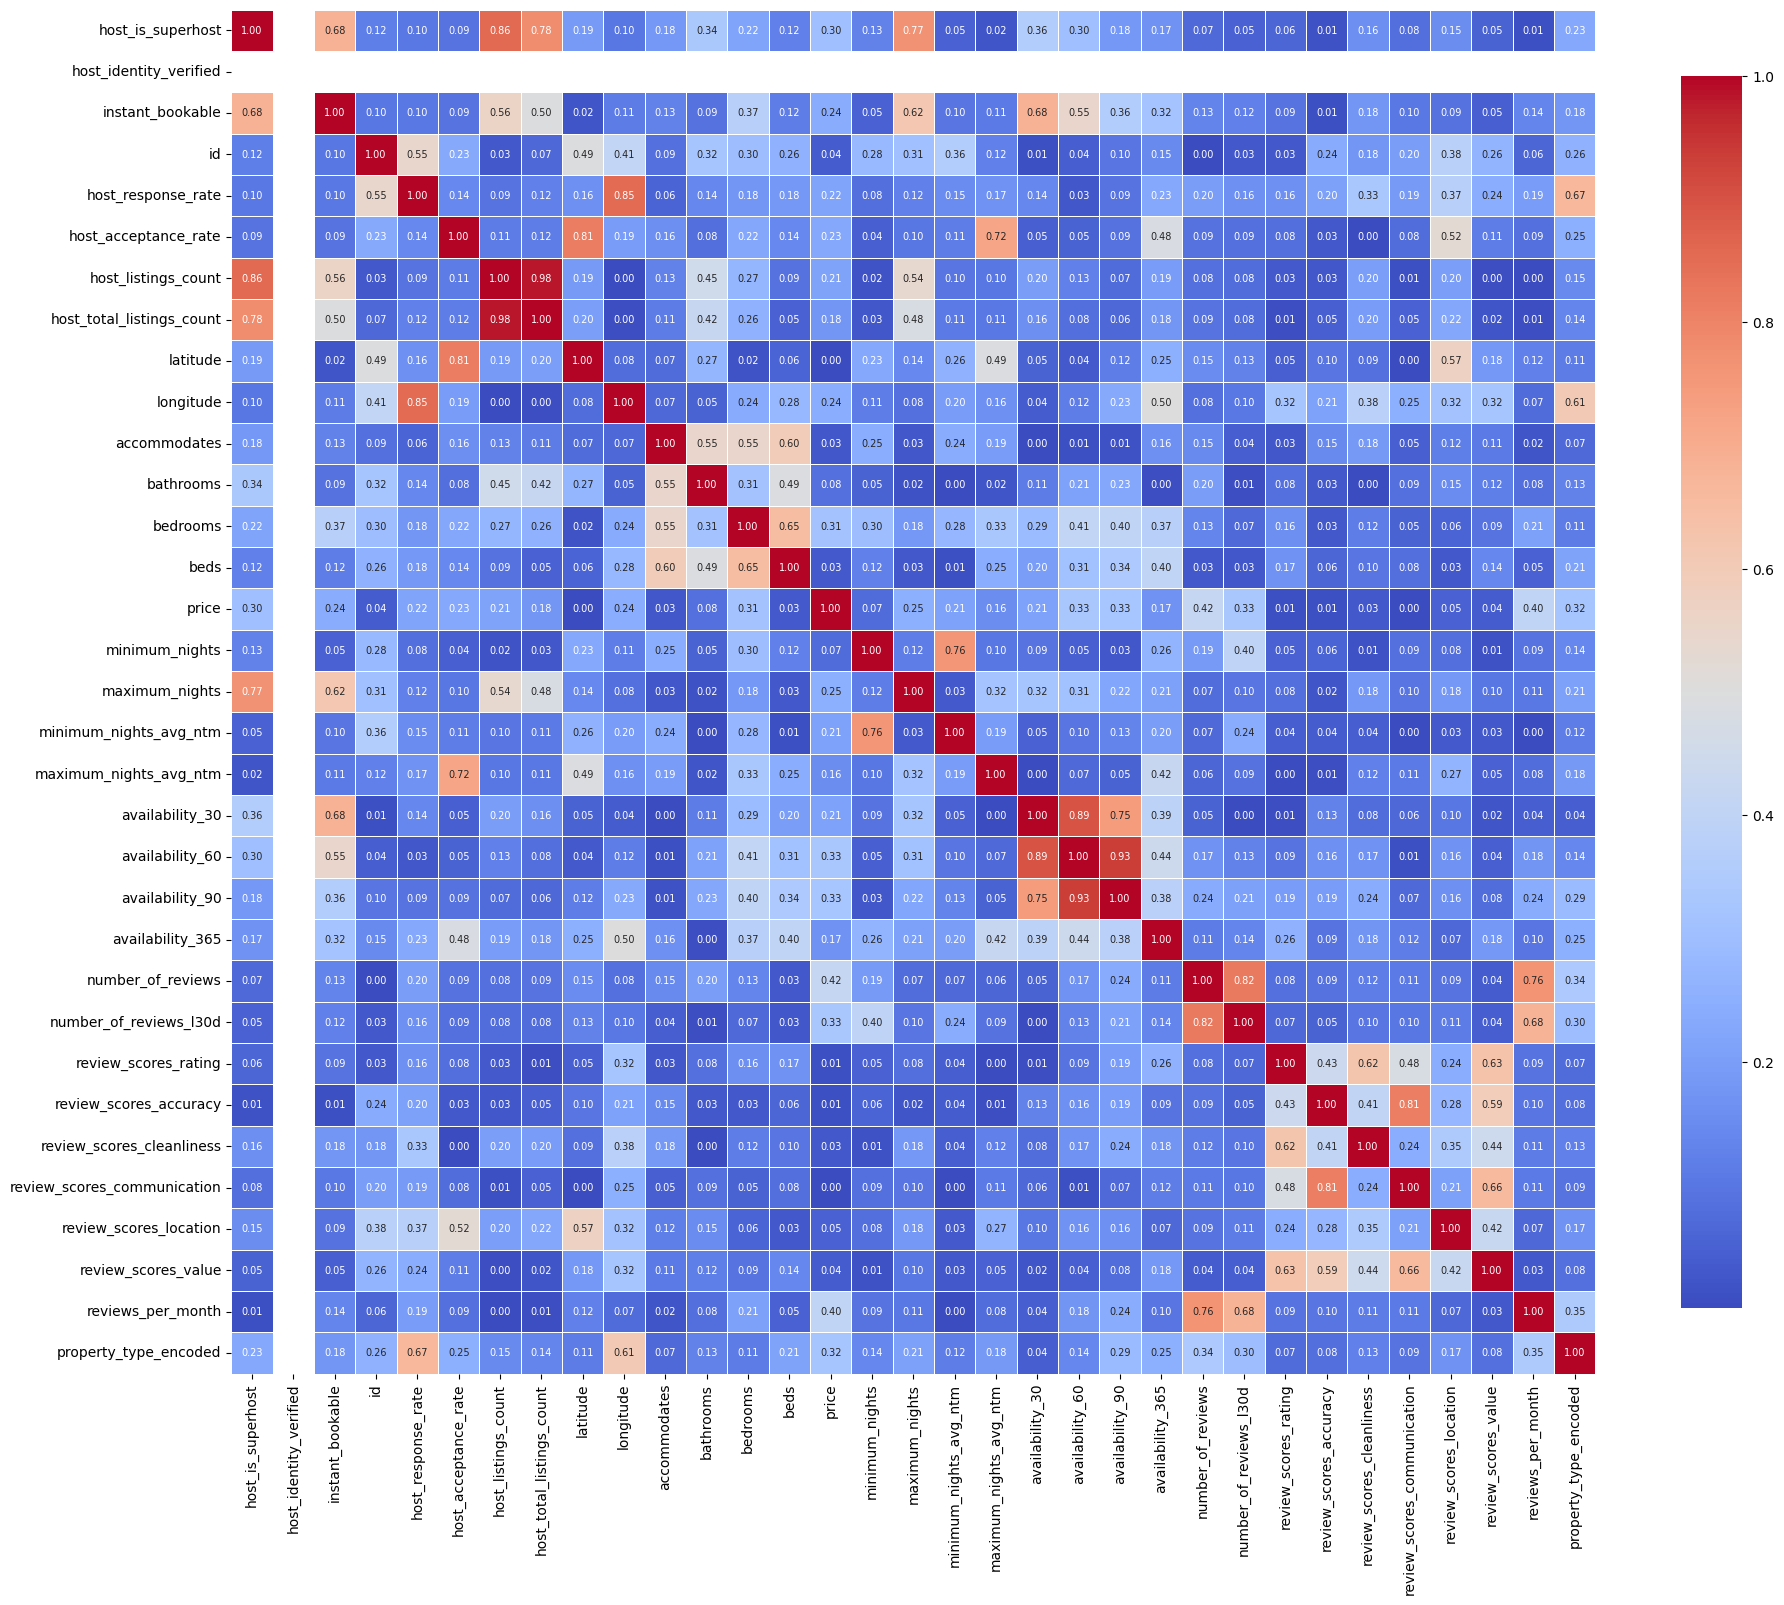

In [182]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(22, 20))

# Crear una máscara para la mitad superior (opcional, si quieres ver solo la parte baja)
mask = np.triu(np.ones_like(corr_Factors1, dtype=bool))

# Crear el mapa de calor con mejoras
heat_map = sns.heatmap(
    corr_Factors1, 
    cmap="coolwarm",   # Mejora la diferenciación entre positivos y negativos
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    square=True,       
    annot_kws={"size": 7},  # Reducimos el tamaño de los números internos
    cbar_kws={"shrink": 0.8}  # Hacemos la barra de colores más compacta
)

# Mejoramos la visibilidad de etiquetas
plt.xticks(rotation=90)  # Rota nombres en X para que no se encimen
plt.yticks(rotation=0)   # Mantiene etiquetas en Y horizontales

# Mostrar el gráfico
plt.show()



In [183]:
variables = [ 
    'host_acceptance_rate', 
    'host_is_superhost', 
    'host_total_listings_count', 
    'room_type', 
    'accommodates', 
    'bedrooms', 
    'price', 
    'review_scores_value', 
    'reviews_per_month' 
]

mejores_variables = {}

for var1, var2 in comparaciones:
    corr_var2 = corr_Factors1[var2].drop([var1, var2]).sort_values(ascending=False)
    
    # Filtrar las variables que están en la lista y tomar las dos primeras
    filtered_vars = [var for var in corr_var2.index if var in variables][:2]
    
    # Solo agregar al diccionario si hay al menos dos variables
    if len(filtered_vars) == 2:
        mejores_variables[(var1, var2)] = {
            var2: filtered_vars
        }

mejores_variables

{('price',
  'host_acceptance_rate'): {'host_acceptance_rate': ['bedrooms',
   'accommodates']},
 ('price',
  'host_is_superhost'): {'host_is_superhost': ['host_total_listings_count',
   'bedrooms']},
 ('accommodates',
  'bathrooms'): {'bathrooms': ['host_total_listings_count',
   'host_is_superhost']},
 ('price',
  'review_scores_cleanliness'): {'review_scores_cleanliness': ['review_scores_value',
   'host_total_listings_count']},
 ('price',
  'host_identity_verified'): {'host_identity_verified': ['host_is_superhost',
   'host_acceptance_rate']},
 ('price',
  'instant_bookable'): {'instant_bookable': ['host_is_superhost',
   'host_total_listings_count']},
 ('price',
  'property_type_encoded'): {'property_type_encoded': ['reviews_per_month',
   'host_acceptance_rate']}}

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

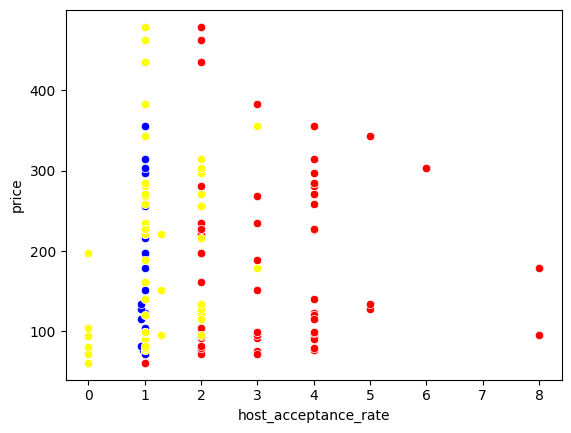

In [184]:
#Imprimimos el scater plot entre la variable dependiente e independientes 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='accommodates', y='price', color="red", data=df)
sns.scatterplot(x='bedrooms', y='price', color="yellow", data=df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

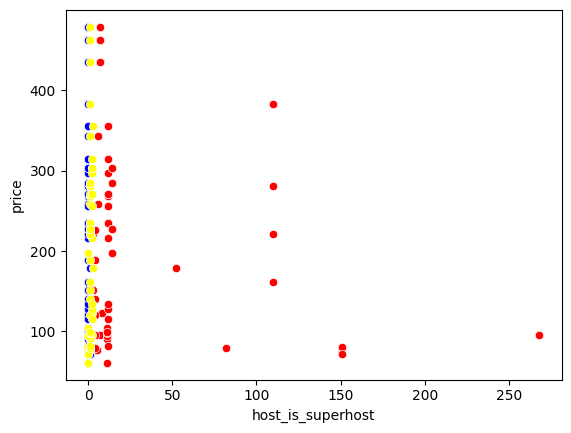

In [185]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="red", data=df)
sns.scatterplot(x='bedrooms', y='price', color="yellow", data=df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

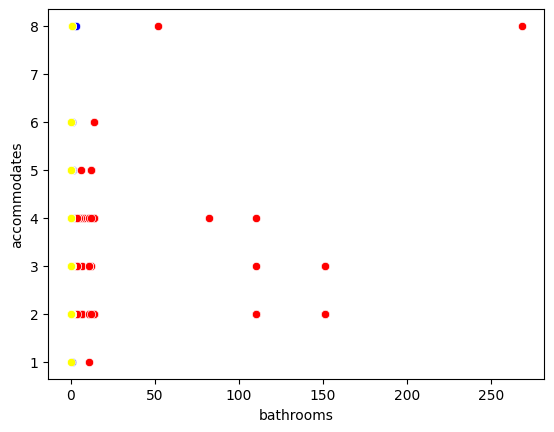

In [186]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='accommodates', color="red", data=df)
sns.scatterplot(x='host_is_superhost', y='accommodates', color="yellow", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

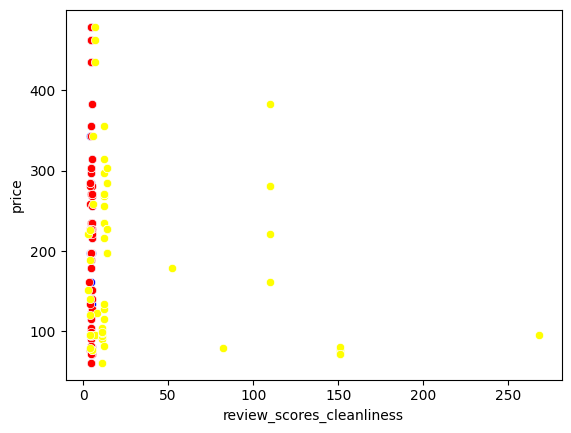

In [187]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_value', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

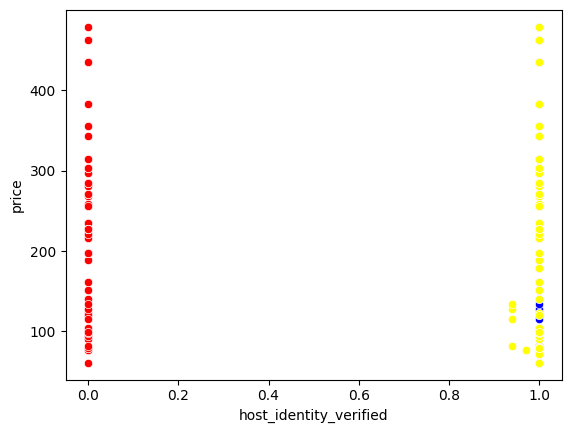

In [188]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

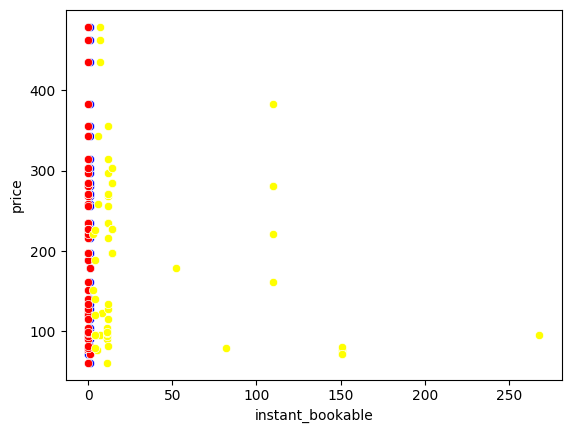

In [189]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='property_type_encoded', ylabel='price'>

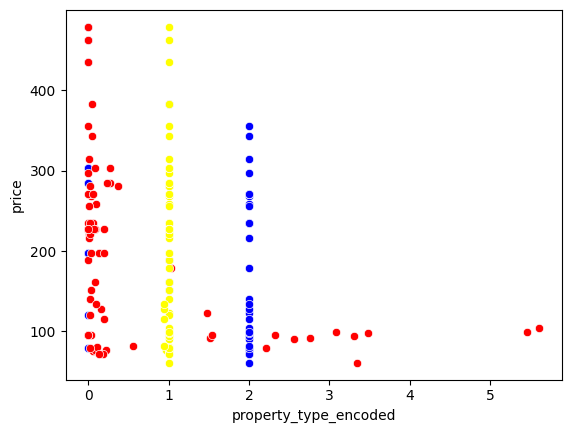

In [190]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)


**| price vs host_acceptance_rate**

In [191]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_acceptance_rate', 'accommodates','bedrooms']]
Var_Dep= df['price']

In [192]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [193]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [194]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([2188.12759647,  -14.55922631,   73.11990557]),
 'rank_': 3,
 'singular_': array([12.07725425,  4.65917129,  0.119158  ]),
 'intercept_': np.float64(-2021.3236499278253)}

In [195]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.21886412377641562

In [196]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_acceptance_rate', 'accommodates','bedrooms']])
y_pred

array([232.74137116, 218.18214485, 269.68985276, 145.38601329,
       254.80685244, 181.68694687, 210.80539949, 181.68694687,
       210.80539949, 210.80539949, 210.80539949, 210.80539949,
       196.24617318, 181.68694687, 167.12772055, 254.80685244,
       196.24617318, 210.80539949, 210.80539949, 196.24617318,
       210.80539949, 254.80685244, 254.80685244, 283.92530506,
       283.92530506, 254.80685244, 327.92675801, 269.36607875,
       116.04311897, 116.04311897, 123.12626761, 137.68549392,
       123.12626761, 137.68549392, 137.68549392, 196.24617318,
       210.80539949, 181.68694687, 123.12626761, 137.68549392,
       181.68694687, 196.24617318, 137.68549392, 181.68694687,
       181.68694687, 181.68694687, 210.80539949, 181.68694687,
       152.24472023, 196.24617318, 181.68694687, 196.24617318,
       181.68694687, 210.80539949, 210.80539949, 210.80539949,
       137.68549392, 181.68694687, 181.68694687, 137.68549392,
       181.68694687, 225.68839981, 181.68694687, 137.68

In [197]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_acceptance_rate', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

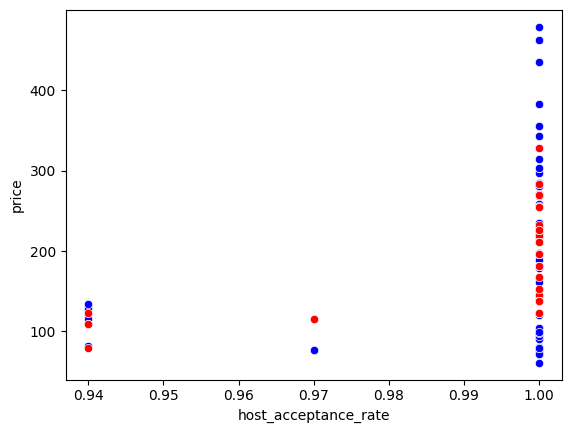

In [198]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)

In [199]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.21886412377641562

In [200]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","price_host_acceptance_rate","correlacion")] = coef_Correl
coef_Correl

np.float64(0.46782916088719356)

**| price vs host_is_superhost**

In [201]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'host_total_listings_count','bedrooms']]
Var_Dep= df['price']

In [202]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [203]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [204]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'host_total_listings_count', 'bedrooms'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-140.80791448,    0.41675169,   41.78118757]),
 'rank_': 3,
 'singular_': array([436.32521385,   5.63281063,   1.57613539]),
 'intercept_': np.float64(144.42688896884033)}

In [205]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.17415123805065846

In [206]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_is_superhost', 'host_total_listings_count','bedrooms']])
y_pred

array([199.99268789, 199.99268789, 150.63362533, 169.62397256,
       231.32327766, 187.87508332, 187.87508332, 187.87508332,
       189.1253384 , 189.1253384 , 189.1253384 , 189.1253384 ,
       189.1253384 , 188.70858671, 188.70858671, 232.99028444,
       191.20909687, 191.20909687, 191.20909687, 191.20909687,
       191.20909687, 232.99028444, 232.99028444, 232.99028444,
       232.99028444, 232.99028444, 274.77147201, 229.65627088,
       188.29183501, 188.29183501,  66.54848042,  66.54848042,
        66.54848042,  66.54848042,  66.54848042, 190.79234518,
       190.79234518, 190.79234518, 149.01115761, 149.01115761,
       190.79234518, 190.79234518, 149.01115761, 190.79234518,
       187.87508332, 187.87508332, 187.87508332, 220.38171552,
       149.01115761, 187.87508332, 187.87508332, 232.05076298,
       232.05076298, 232.05076298, 232.05076298, 232.05076298,
       150.2614127 , 192.04260026, 192.04260026, 150.2614127 ,
       192.04260026, 233.82378783, 192.04260026, 150.26

In [207]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_is_superhost', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_is_superhost', ylabel='price'>

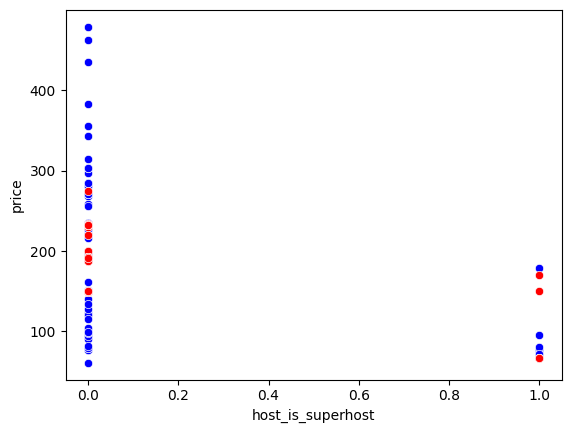

In [208]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)
#sns.lineplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)

In [209]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.17415123805065846

In [210]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4173143156550689)

**| accommodates vs bathrooms**

In [211]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bathrooms', 'host_total_listings_count','host_is_superhost']]
Var_Dep= df['accommodates']

In [212]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [213]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [214]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'host_total_listings_count', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.02475288, -0.00820822,  0.99999163]),
 'rank_': 3,
 'singular_': array([436.32374896,   2.09848211,   1.57579775]),
 'intercept_': np.float64(0.15553540650562425)}

In [215]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.33630975637212

In [216]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['bathrooms', 'host_total_listings_count','host_is_superhost']])
y_pred

array([3.15566362, 3.15566362, 5.26582867, 8.02998144, 3.11462249,
       3.14745539, 3.14745539, 3.14745539, 3.12283072, 3.12283072,
       3.12283072, 3.12283072, 3.12283072, 3.13103894, 4.64341538,
       4.59416603, 3.08178959, 3.08178959, 3.08178959, 3.08178959,
       3.08178959, 4.59416603, 4.59416603, 3.08178959, 3.08178959,
       4.59416603, 4.59416603, 3.14745539, 3.13924717, 3.13924717,
       2.94083798, 2.94083798, 2.94083798, 2.94083798, 2.94083798,
       3.08999782, 3.08999782, 3.08999782, 3.08999782, 3.08999782,
       3.08999782, 3.08999782, 3.08999782, 3.08999782, 3.14745539,
       3.14745539, 3.14745539, 2.50721386, 3.08999782, 3.14745539,
       3.14745539, 2.27738356, 2.27738356, 2.27738356, 2.27738356,
       2.27738356, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.06537314, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.06537314, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.08178959, 3.08178959, 3.08178959, 3.08178959])

In [217]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(28, 'Predicciones_accommodates_bathrooms', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='bathrooms', ylabel='accommodates'>

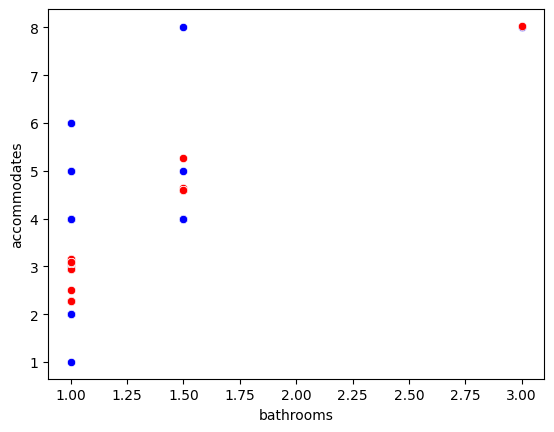

In [218]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)
#sns.lineplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)

In [219]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","accommodates_bathrooms","determinacion")] = coef_Deter
coef_Deter

0.33630975637212

In [220]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","accommodates_bathrooms","correlacion")] = coef_Correl
coef_Correl

np.float64(0.5799221985509091)

**| price vs review_scores_cleanliness**

In [221]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_cleanliness', 'review_scores_value','host_total_listings_count']]
Var_Dep= df['price']

In [222]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [223]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [224]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_value',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 14.23041153, -19.91790752,  -0.37397956]),
 'rank_': 3,
 'singular_': array([436.31841836,   2.6957298 ,   1.51457143]),
 'intercept_': np.float64(225.58575065478897)}

In [225]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03494771001366159

In [226]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['review_scores_cleanliness', 'review_scores_value','host_total_listings_count']])
y_pred

array([196.02633205, 196.02633205, 180.03367363,  97.49073063,
       196.63154543, 198.21289284, 198.21289284, 198.21289284,
       194.5304138 , 197.09095415, 197.09095415, 197.09095415,
       197.09095415, 217.61080793, 190.63293559, 195.22105633,
       192.66051598, 192.66051598, 199.23342546, 195.22105633,
       192.66051598, 195.22105633, 192.66051598, 192.66051598,
       192.66051598, 192.66051598, 195.22105633, 198.21289284,
       200.94034932, 200.96586891, 145.65683346, 147.25026607,
       140.67735659, 146.45354977, 147.25026607, 195.59480246,
       194.14344054, 195.11078172, 195.36706919, 196.98882255,
       194.7412112 , 194.99726523, 194.57035289, 193.1192244 ,
       195.65235249, 195.65235249, 195.65235249, 167.3343706 ,
       193.40336577, 198.21289284, 198.21289284, 156.01051871,
       156.01051871, 177.35030022, 156.01051871, 175.92842622,
       197.68875003, 193.33443084, 193.33443084, 181.66572682,
       202.41147258, 197.03363755, 205.68213292, 196.35

In [227]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

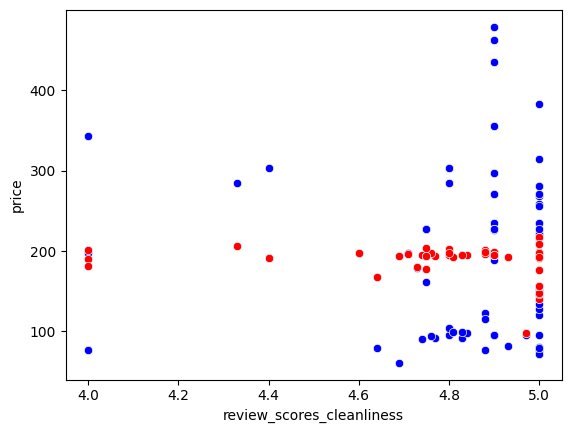

In [228]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)

In [229]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.03494771001366159

In [230]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.18694306623585052)

**| price vs host_identity_verified**

In [231]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_identity_verified', 'host_is_superhost','host_acceptance_rate']]
Var_Dep= df['price']

In [232]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [233]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [234]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified', 'host_is_superhost',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([   0.        , -113.60578662, 1842.43520193]),
 'rank_': 2,
 'singular_': array([2.51753157, 0.12188691, 0.        ]),
 'intercept_': np.float64(-1635.5437010247126)}

In [235]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15926163597484266

In [236]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_identity_verified', 'host_is_superhost','host_acceptance_rate']])
y_pred

array([206.8915009 , 206.8915009 ,  93.28571429,  93.28571429,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       151.61844485, 151.61844485,  93.28571429,  93.28571429,
        93.28571429,  93.28571429,  93.28571429, 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.89

In [237]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_identity_verified', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_identity_verified', ylabel='price'>

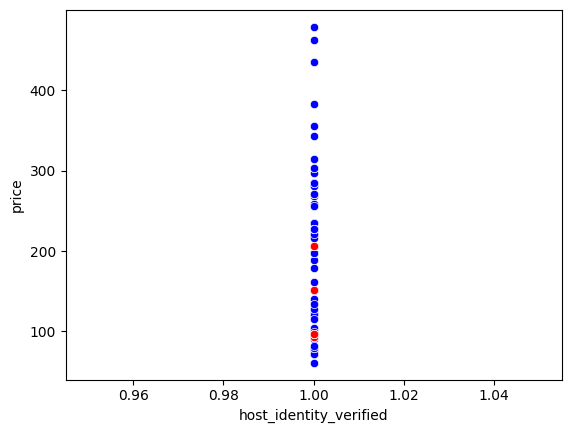

In [238]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)

In [239]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.15926163597484266

In [240]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.39907597769703285)

**| price vs instant_bookable**

In [241]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['instant_bookable', 'host_is_superhost','host_total_listings_count']]
Var_Dep= df['price']

In [242]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [243]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [244]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'host_is_superhost',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([  17.48613463, -131.55643149,    0.2825019 ]),
 'rank_': 3,
 'singular_': array([436.32445447,   2.41756939,   1.19293113]),
 'intercept_': np.float64(176.46188649750945)}

In [245]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.10252363634227613

In [246]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['instant_bookable', 'host_is_superhost','host_total_listings_count']])
y_pred

array([194.79552683, 194.79552683,  77.08168859, 138.10209963,
       196.20803635, 195.07802874, 195.07802874, 195.07802874,
       195.92553444, 195.92553444, 195.92553444, 195.92553444,
       195.92553444, 195.64303254, 195.64303254, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 195.07802874,
       195.36053064, 195.36053064,  87.56324236,  87.56324236,
        87.56324236,  87.56324236,  87.56324236, 197.05554206,
       197.05554206, 197.05554206, 197.05554206, 197.05554206,
       197.05554206, 197.05554206, 197.05554206, 197.05554206,
       195.07802874, 195.07802874, 195.07802874, 217.11317717,
       197.05554206, 177.59189411, 177.59189411, 225.02323045,
       225.02323045, 225.02323045, 225.02323045, 225.02323045,
       197.90304777, 197.90304777, 197.90304777, 197.90304777,
       197.90304777, 197.90304777, 197.90304777, 197.90

In [247]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_instant_bookable', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='instant_bookable', ylabel='price'>

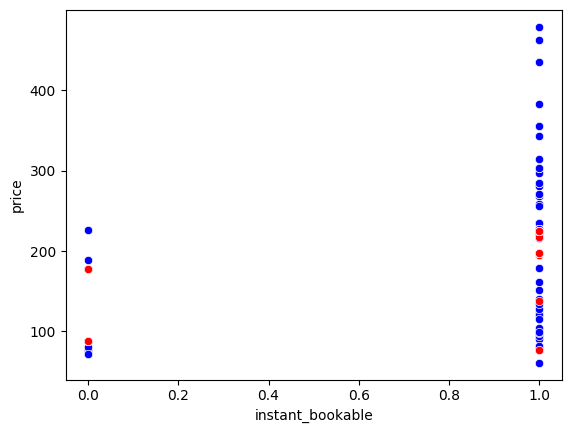

In [248]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)

In [249]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.10252363634227613

In [250]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.3201931235087289)

**| price vs property_type**

In [251]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['property_type_encoded', 'reviews_per_month','host_acceptance_rate']]
Var_Dep= df['price']

In [252]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [253]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [254]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded', 'reviews_per_month',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ -16.16453545,  -30.50564602, 1602.26783125]),
 'rank_': 3,
 'singular_': array([11.10244826,  6.75285592,  0.11639776]),
 'intercept_': np.float64(-1368.8779762849101)}

In [255]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2449913111643761

In [256]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['property_type_encoded', 'reviews_per_month','host_acceptance_rate']])
y_pred

array([216.92026305, 216.31015013, 169.63996865, 146.14716427,
       155.91242794, 217.22531951, 217.22531951, 217.22531951,
       232.16962912, 233.38985496, 233.38985496, 233.38985496,
       233.38985496, 198.01021945, 199.53550176, 201.06078406,
       199.84055822, 200.45067114, 199.2304453 , 201.06078406,
       200.45067114, 201.06078406, 199.2304453 , 200.7557276 ,
       200.7557276 , 200.7557276 , 201.06078406, 233.38985496,
       146.28150699, 150.55229744, 199.2304453 , 198.31527591,
       195.56976777, 197.70516299, 196.78999361, 116.86520103,
       154.6922021 , 122.96633024, 154.08208918, 100.08709572,
        94.90113589,  34.49995677,  29.92410986, 107.1033943 ,
       232.77974204, 200.45067114, 232.77974204, 133.64330634,
        98.86686988, 217.22531951, 217.22531951, 215.70003721,
       216.61520659, 214.78486783, 216.61520659, 205.93823048,
       229.42412098, 230.64434682, 227.28872576, 232.47468558,
       225.15333053, 225.15333053, 226.06849992, 229.11

In [257]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_property_type', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='property_type_encoded', ylabel='price'>

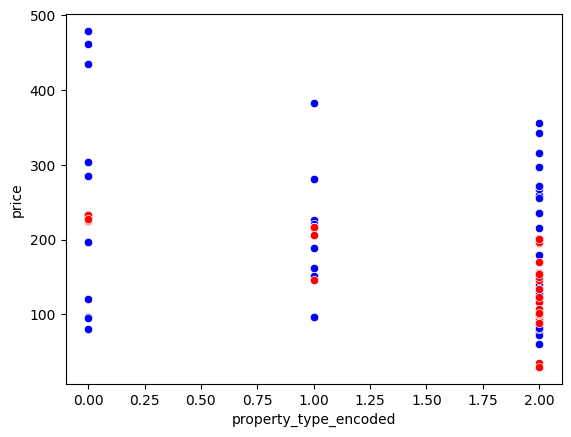

In [258]:
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)

In [259]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Private_room","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.2449913111643761

In [260]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Private_room","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4949659697033485)

# Shared Room

In [261]:
#Cargar desde un archivo .csv
df = pd.read_csv('room_type_Grecia/Hotel_room_Grecia.csv')

df.head()

last_scraped           source  \
0   2024-09-23  previous scrape   
1   2024-09-23      city scrape   
2   2024-09-23      city scrape   
3   2024-09-23      city scrape   
4   2024-09-23      city scrape   

                                                name  \
0  Standard Double Room with private shower & Bal...   
1          Triple Room with private shower & Balcony   
2    Exceptional Penthouse close to Acropolis by GHH   
3          Acropolis Grand Residence, Stunning Views   
4            AcropolisView -Two Bedroom Apt by Meros   

                                         description  \
0  My place is close to restaurants and dining, p...   
1  My place is close to restaurants and dining, p...   
2  This exceptional Penthouse close to the Acropo...   
3  Located in a 1930’s neoclassical building, dir...   
4  The apartment is located at the foothills of A...   

                               neighborhood_overview             host_name  \
0                                      No disponible          Konstantinos   
1                                      No disponible          Konstantinos   
2  A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3  The residence is located at 12 Syggrou avenue ...             Vasileios   
4  Thissio is a traditional neighborhood in downt...                 Meros   

   host_since   host_location  \
0  2016-01-10  Athens, Greece   
1  2016-01-10  Athens, Greece   
2  2015-10-20  Athens, Greece   
3  2017-01-31  Athens, Greece   
4  2015-05-06  Athens, Greece   

                                          host_about host_response_time  ...  \
0                                      No disponible     within an hour  ...   
1                                      No disponible     within an hour  ...   
2  Find your own home in Greece, for holidays or ...     within an hour  ...   
3  We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4  Hi, we are Meros team and we will be your host...     within an hour  ...   

  availability_365 number_of_reviews number_of_reviews_l30d  \
0              320               1.0                    0.0   
1              328               1.0                    0.0   
2              135              84.0                    1.0   
3              292             184.0                    1.0   
4               74             116.0                    5.0   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 4.00                   5.00                      5.00   
1                 5.00                   5.00                      5.00   
2                 4.64                   4.73                      4.73   
3                 4.98                   4.97                      4.97   
4                 4.77                   4.84                      4.88   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   5.00                5.00   
1                        5.00                   5.00                5.00   
2                        4.94                   4.95                4.69   
3                        4.98                   4.99                4.95   
4                        4.79                   4.92                4.79   

  reviews_per_month  
0              0.01  
1              0.03  
2              1.03  
3              2.33  
4              1.48  

[5 rows x 50 columns]

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 74 non-null     object 
 1   source                       74 non-null     object 
 2   name                         74 non-null     object 
 3   description                  74 non-null     object 
 4   neighborhood_overview        74 non-null     object 
 5   host_name                    74 non-null     object 
 6   host_since                   74 non-null     object 
 7   host_location                74 non-null     object 
 8   host_about                   74 non-null     object 
 9   host_response_time           74 non-null     object 
 10  host_is_superhost            74 non-null     object 
 11  host_verifications           74 non-null     object 
 12  host_identity_verified       74 non-null     object 
 13  neighbourhood_cleansed

In [263]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    df[var] = df[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [264]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
df["property_type_encoded"] = le.fit_transform(df["property_type"])

In [265]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable"),
    ("price", "property_type_encoded")
]

In [266]:
#eliminamos la columna tipo string
df2 = df.select_dtypes(include=[np.number])

#Encontramos todas las correlaciones entre las variables
corr_Factors = df2.corr()
corr_Factors

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                     NaN   
host_identity_verified                     NaN                     NaN   
instant_bookable                     -0.684435                     NaN   
id                                   -0.120142                     NaN   
host_response_rate                    0.103414                     NaN   
host_acceptance_rate                  0.092089                     NaN   
host_listings_count                   0.856433                     NaN   
host_total_listings_count             0.779562                     NaN   
latitude                             -0.191295                     NaN   
longitude                            -0.099612                     NaN   
accommodates                          0.182031                     NaN   
bathrooms                             0.340263                     NaN   
bedrooms                             -0.215679                     NaN   
beds                                  0.122325                     NaN   
price                                -0.304569                     NaN   
minimum_nights                        0.128806                     NaN   
maximum_nights                       -0.766996                     NaN   
minimum_nights_avg_ntm                0.049812                     NaN   
maximum_nights_avg_ntm               -0.020447                     NaN   
availability_30                       0.359104                     NaN   
availability_60                       0.301524                     NaN   
availability_90                       0.183830                     NaN   
availability_365                      0.169178                     NaN   
number_of_reviews                     0.068745                     NaN   
number_of_reviews_l30d               -0.049744                     NaN   
review_scores_rating                  0.061877                     NaN   
review_scores_accuracy               -0.013928                     NaN   
review_scores_cleanliness             0.159061                     NaN   
review_scores_communication           0.081207                     NaN   
review_scores_location                0.153514                     NaN   
review_scores_value                   0.052065                     NaN   
reviews_per_month                    -0.010089                     NaN   
property_type_encoded                 0.230879                     NaN   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                   -0.684435 -0.120142            0.103414   
host_identity_verified                    NaN       NaN                 NaN   
instant_bookable                     1.000000 -0.099870           -0.103414   
id                                  -0.099870  1.000000           -0.545528   
host_response_rate                  -0.103414 -0.545528            1.000000   
host_acceptance_rate                -0.092089 -0.233761           -0.143439   
host_listings_count                 -0.559267  0.029073            0.094325   
host_total_listings_count           -0.495521  0.066169            0.124268   
latitude                            -0.021774  0.494803           -0.162045   
longitude                            0.110512  0.407492           -0.852533   
accommodates                         0.127236 -0.085916           -0.056148   
bathrooms                            0.089421 -0.322584            0.139283   
bedrooms                             0.372486 -0.296771            0.177387   
beds                                 0.115887 -0.259035            0.183579   
price                                0.240711 -0.039382           -0.217454   
minimum_nights                       0.051036 -0.282357            0.079495   
maximum_nights                       0.616593  0.305789           -0.123015   
minimum_nights_avg_ntm               0.097632 -0.358105            0.152073   
maximum_nig

In [267]:
corr_Factors1 = abs(corr_Factors)
corr_Factors1

host_is_superhost  host_identity_verified  \
host_is_superhost                     1.000000                     NaN   
host_identity_verified                     NaN                     NaN   
instant_bookable                      0.684435                     NaN   
id                                    0.120142                     NaN   
host_response_rate                    0.103414                     NaN   
host_acceptance_rate                  0.092089                     NaN   
host_listings_count                   0.856433                     NaN   
host_total_listings_count             0.779562                     NaN   
latitude                              0.191295                     NaN   
longitude                             0.099612                     NaN   
accommodates                          0.182031                     NaN   
bathrooms                             0.340263                     NaN   
bedrooms                              0.215679                     NaN   
beds                                  0.122325                     NaN   
price                                 0.304569                     NaN   
minimum_nights                        0.128806                     NaN   
maximum_nights                        0.766996                     NaN   
minimum_nights_avg_ntm                0.049812                     NaN   
maximum_nights_avg_ntm                0.020447                     NaN   
availability_30                       0.359104                     NaN   
availability_60                       0.301524                     NaN   
availability_90                       0.183830                     NaN   
availability_365                      0.169178                     NaN   
number_of_reviews                     0.068745                     NaN   
number_of_reviews_l30d                0.049744                     NaN   
review_scores_rating                  0.061877                     NaN   
review_scores_accuracy                0.013928                     NaN   
review_scores_cleanliness             0.159061                     NaN   
review_scores_communication           0.081207                     NaN   
review_scores_location                0.153514                     NaN   
review_scores_value                   0.052065                     NaN   
reviews_per_month                     0.010089                     NaN   
property_type_encoded                 0.230879                     NaN   

                             instant_bookable        id  host_response_rate  \
host_is_superhost                    0.684435  0.120142            0.103414   
host_identity_verified                    NaN       NaN                 NaN   
instant_bookable                     1.000000  0.099870            0.103414   
id                                   0.099870  1.000000            0.545528   
host_response_rate                   0.103414  0.545528            1.000000   
host_acceptance_rate                 0.092089  0.233761            0.143439   
host_listings_count                  0.559267  0.029073            0.094325   
host_total_listings_count            0.495521  0.066169            0.124268   
latitude                             0.021774  0.494803            0.162045   
longitude                            0.110512  0.407492            0.852533   
accommodates                         0.127236  0.085916            0.056148   
bathrooms                            0.089421  0.322584            0.139283   
bedrooms                             0.372486  0.296771            0.177387   
beds                                 0.115887  0.259035            0.183579   
price                                0.240711  0.039382            0.217454   
minimum_nights                       0.051036  0.282357            0.079495   
maximum_nights                       0.616593  0.305789            0.123015   
minimum_nights_avg_ntm               0.097632  0.358105            0.152073   
maximum_nig

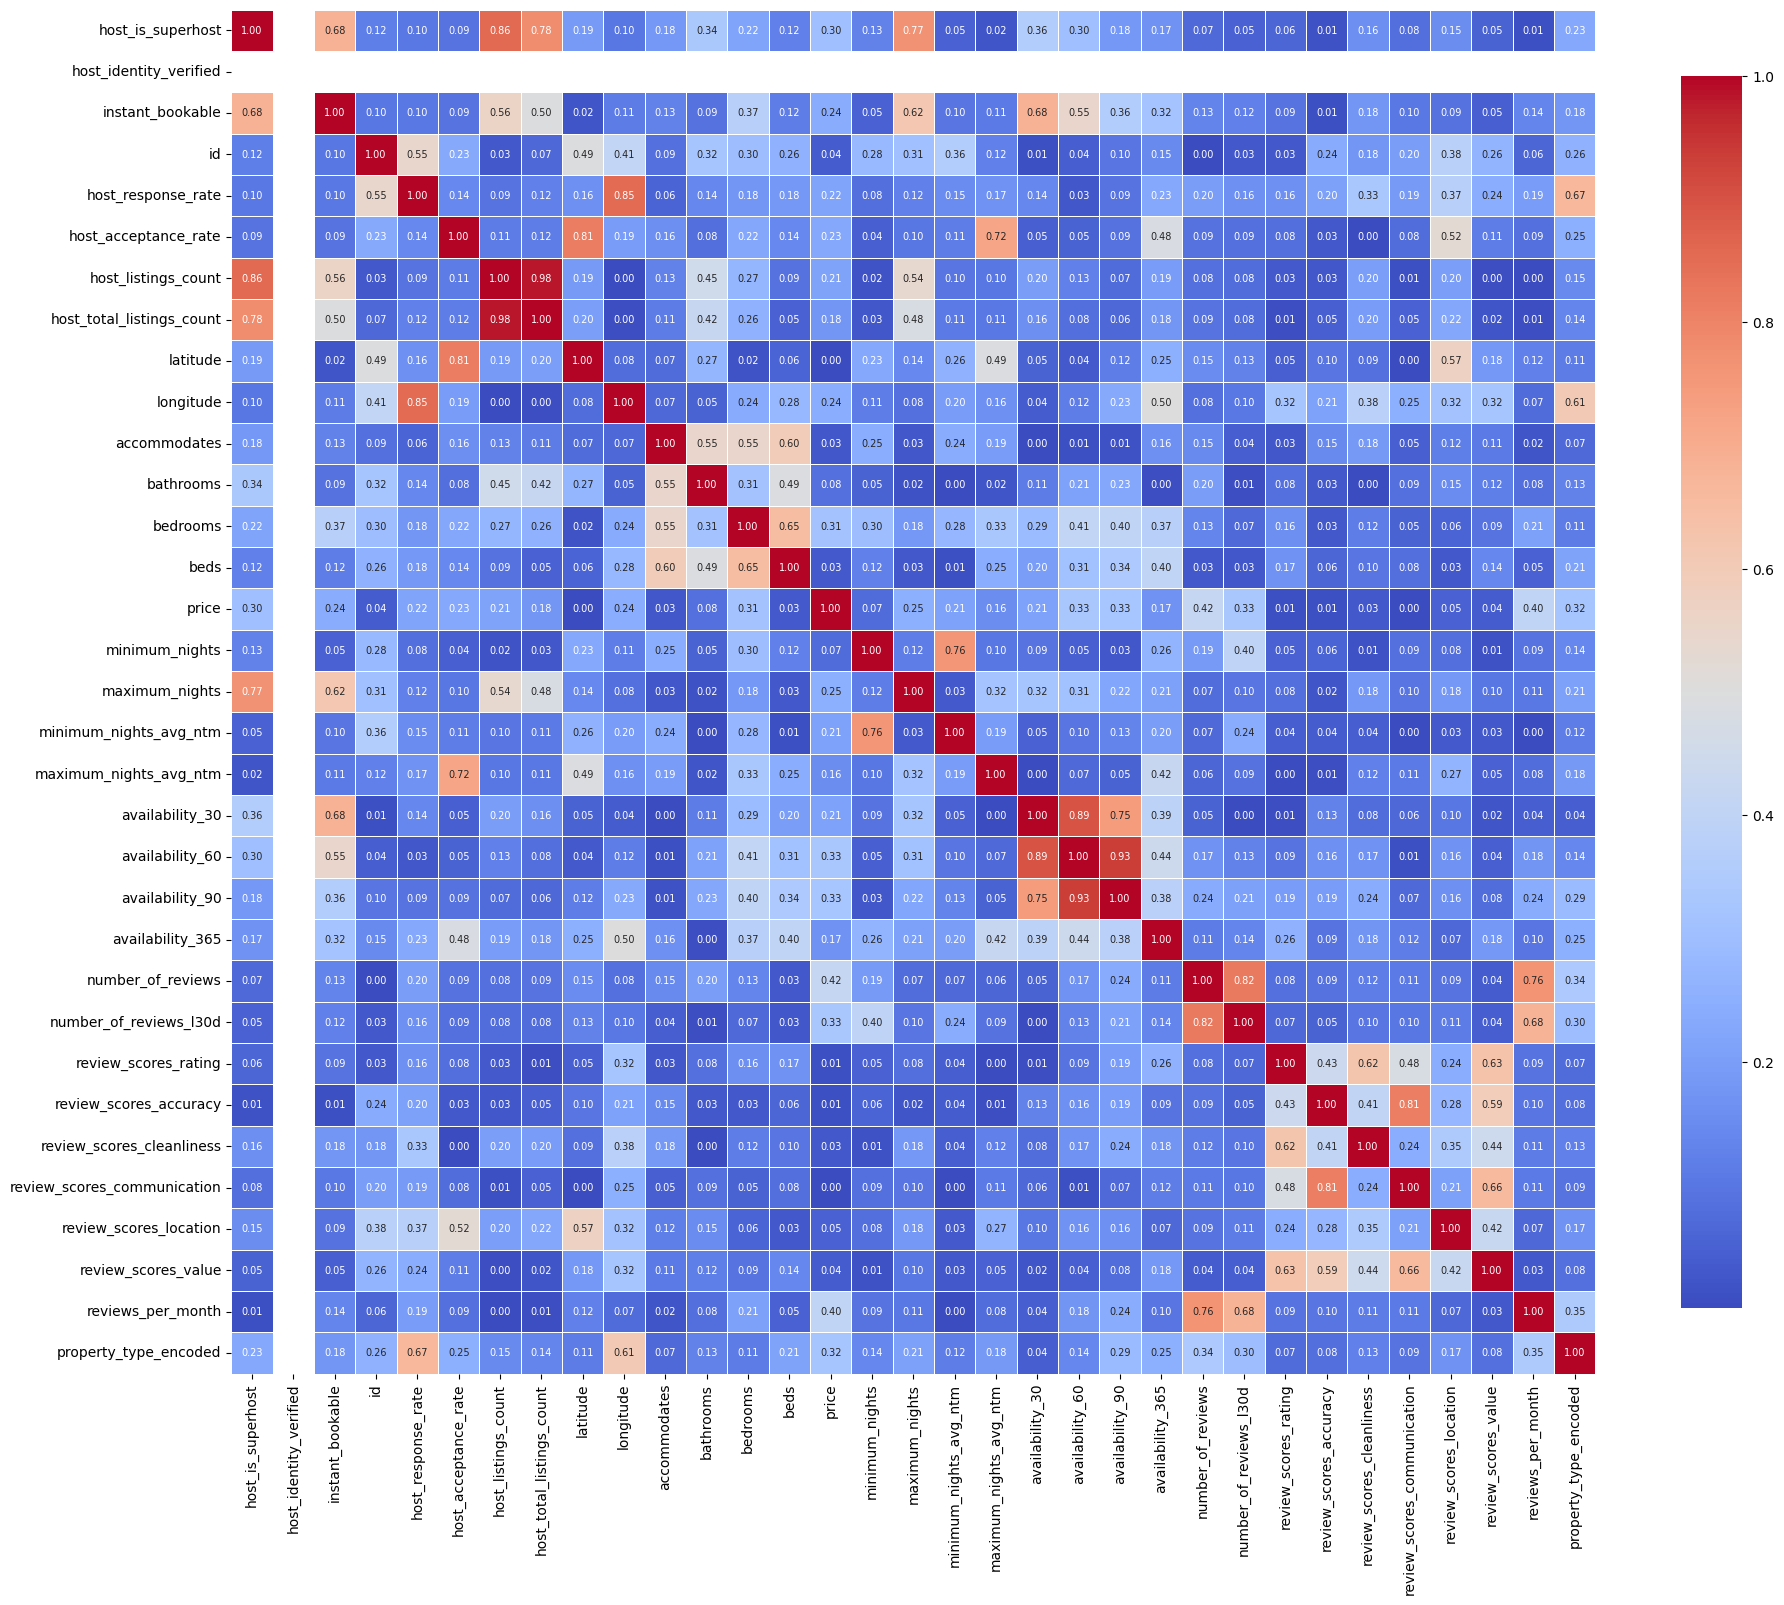

In [268]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(22, 20))

# Crear una máscara para la mitad superior (opcional, si quieres ver solo la parte baja)
mask = np.triu(np.ones_like(corr_Factors1, dtype=bool))

# Crear el mapa de calor con mejoras
heat_map = sns.heatmap(
    corr_Factors1, 
    cmap="coolwarm",   # Mejora la diferenciación entre positivos y negativos
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    square=True,       
    annot_kws={"size": 7},  # Reducimos el tamaño de los números internos
    cbar_kws={"shrink": 0.8}  # Hacemos la barra de colores más compacta
)

# Mejoramos la visibilidad de etiquetas
plt.xticks(rotation=90)  # Rota nombres en X para que no se encimen
plt.yticks(rotation=0)   # Mantiene etiquetas en Y horizontales

# Mostrar el gráfico
plt.show()



In [269]:
variables = [ 
    'host_acceptance_rate', 
    'host_is_superhost', 
    'host_total_listings_count', 
    'room_type', 
    'accommodates', 
    'bedrooms', 
    'price', 
    'review_scores_value', 
    'reviews_per_month' 
]

mejores_variables = {}

for var1, var2 in comparaciones:
    corr_var2 = corr_Factors1[var2].drop([var1, var2]).sort_values(ascending=False)
    
    # Filtrar las variables que están en la lista y tomar las dos primeras
    filtered_vars = [var for var in corr_var2.index if var in variables][:2]
    
    # Solo agregar al diccionario si hay al menos dos variables
    if len(filtered_vars) == 2:
        mejores_variables[(var1, var2)] = {
            var2: filtered_vars
        }

mejores_variables

{('price',
  'host_acceptance_rate'): {'host_acceptance_rate': ['bedrooms',
   'accommodates']},
 ('price',
  'host_is_superhost'): {'host_is_superhost': ['host_total_listings_count',
   'bedrooms']},
 ('accommodates',
  'bathrooms'): {'bathrooms': ['host_total_listings_count',
   'host_is_superhost']},
 ('price',
  'review_scores_cleanliness'): {'review_scores_cleanliness': ['review_scores_value',
   'host_total_listings_count']},
 ('price',
  'host_identity_verified'): {'host_identity_verified': ['host_is_superhost',
   'host_acceptance_rate']},
 ('price',
  'instant_bookable'): {'instant_bookable': ['host_is_superhost',
   'host_total_listings_count']},
 ('price',
  'property_type_encoded'): {'property_type_encoded': ['reviews_per_month',
   'host_acceptance_rate']}}

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

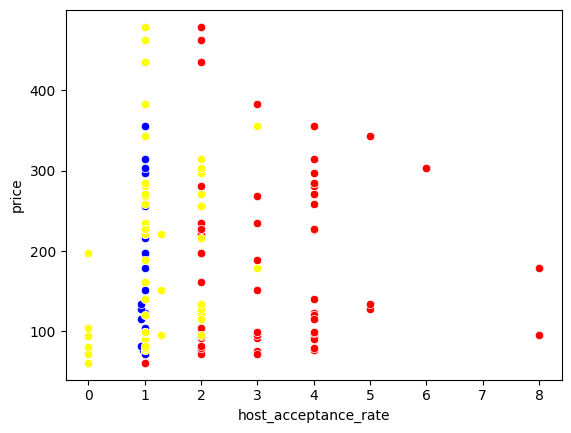

In [270]:
#Imprimimos el scater plot entre la variable dependiente e independientes 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='accommodates', y='price', color="red", data=df)
sns.scatterplot(x='bedrooms', y='price', color="yellow", data=df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

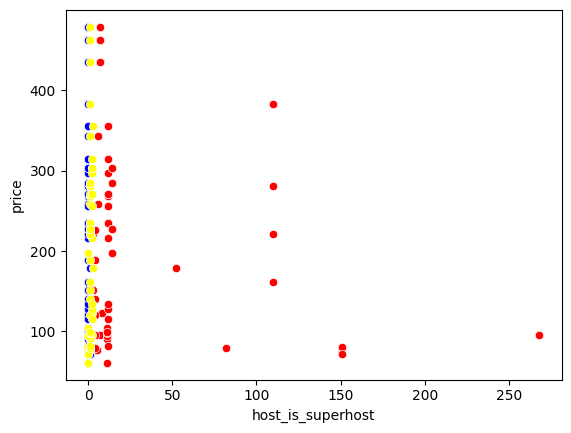

In [271]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="red", data=df)
sns.scatterplot(x='bedrooms', y='price', color="yellow", data=df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

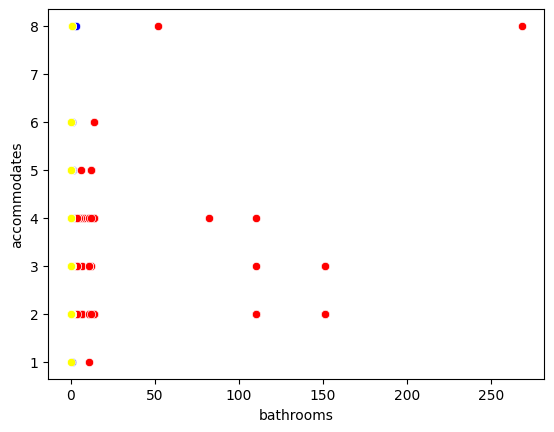

In [272]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='host_total_listings_count', y='accommodates', color="red", data=df)
sns.scatterplot(x='host_is_superhost', y='accommodates', color="yellow", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

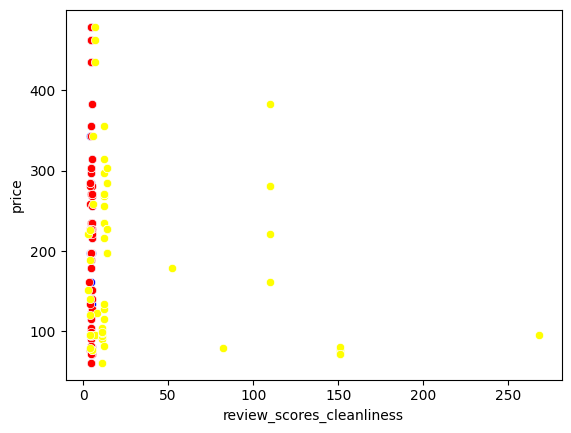

In [273]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_value', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

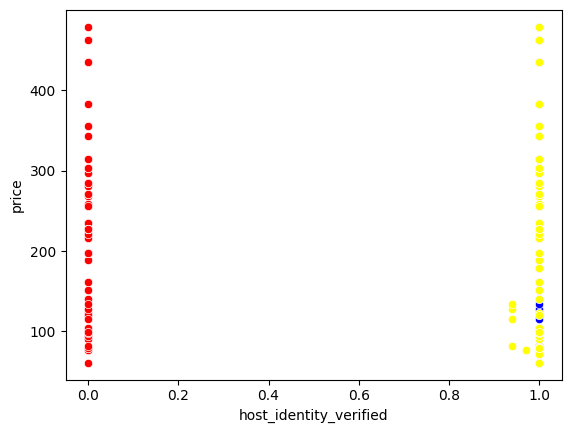

In [274]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

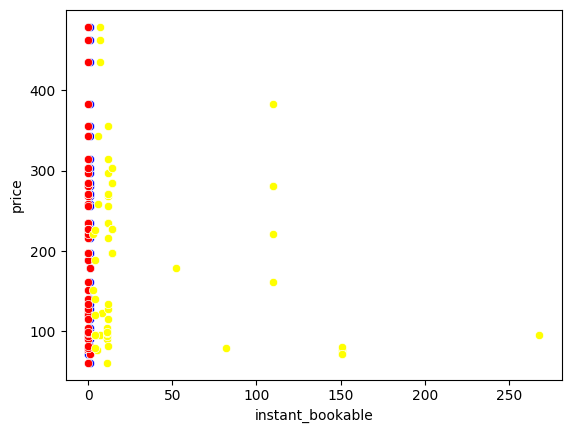

In [275]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

<Axes: xlabel='property_type_encoded', ylabel='price'>

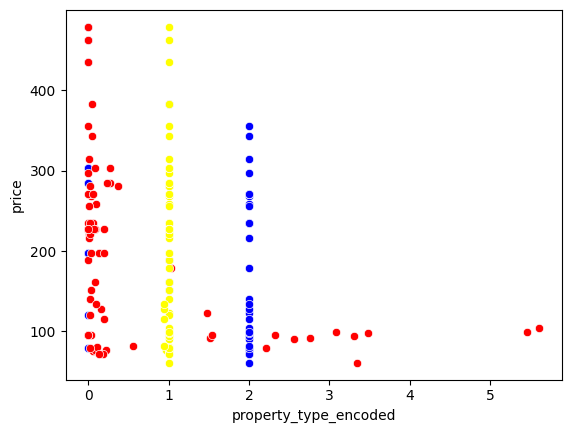

In [276]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="red", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="yellow", data=df)


**| price vs host_acceptance_rate**

In [277]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_acceptance_rate', 'accommodates','bedrooms']]
Var_Dep= df['price']

In [278]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [279]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [280]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'accommodates', 'bedrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([2188.12759647,  -14.55922631,   73.11990557]),
 'rank_': 3,
 'singular_': array([12.07725425,  4.65917129,  0.119158  ]),
 'intercept_': np.float64(-2021.3236499278253)}

In [281]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.21886412377641562

In [282]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_acceptance_rate', 'accommodates','bedrooms']])
y_pred

array([232.74137116, 218.18214485, 269.68985276, 145.38601329,
       254.80685244, 181.68694687, 210.80539949, 181.68694687,
       210.80539949, 210.80539949, 210.80539949, 210.80539949,
       196.24617318, 181.68694687, 167.12772055, 254.80685244,
       196.24617318, 210.80539949, 210.80539949, 196.24617318,
       210.80539949, 254.80685244, 254.80685244, 283.92530506,
       283.92530506, 254.80685244, 327.92675801, 269.36607875,
       116.04311897, 116.04311897, 123.12626761, 137.68549392,
       123.12626761, 137.68549392, 137.68549392, 196.24617318,
       210.80539949, 181.68694687, 123.12626761, 137.68549392,
       181.68694687, 196.24617318, 137.68549392, 181.68694687,
       181.68694687, 181.68694687, 210.80539949, 181.68694687,
       152.24472023, 196.24617318, 181.68694687, 196.24617318,
       181.68694687, 210.80539949, 210.80539949, 210.80539949,
       137.68549392, 181.68694687, 181.68694687, 137.68549392,
       181.68694687, 225.68839981, 181.68694687, 137.68

In [283]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_acceptance_rate', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

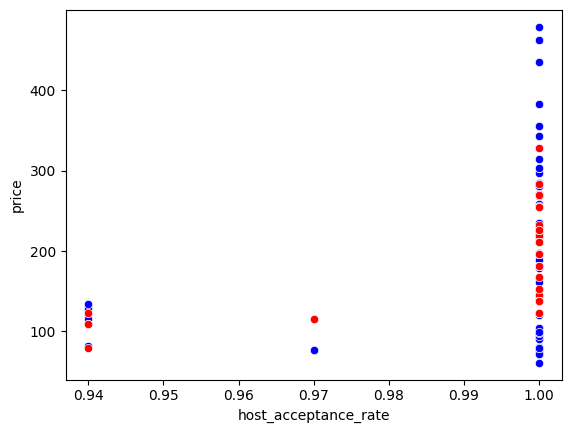

In [284]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=df)

In [285]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.21886412377641562

In [286]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","price_host_acceptance_rate","correlacion")] = coef_Correl    
coef_Correl

np.float64(0.46782916088719356)

**| price vs host_is_superhost**

In [287]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'host_total_listings_count','bedrooms']]
Var_Dep= df['price']

In [288]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [289]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [290]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'host_total_listings_count', 'bedrooms'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-140.80791448,    0.41675169,   41.78118757]),
 'rank_': 3,
 'singular_': array([436.32521385,   5.63281063,   1.57613539]),
 'intercept_': np.float64(144.42688896884033)}

In [291]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.17415123805065846

In [292]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_is_superhost', 'host_total_listings_count','bedrooms']])
y_pred

array([199.99268789, 199.99268789, 150.63362533, 169.62397256,
       231.32327766, 187.87508332, 187.87508332, 187.87508332,
       189.1253384 , 189.1253384 , 189.1253384 , 189.1253384 ,
       189.1253384 , 188.70858671, 188.70858671, 232.99028444,
       191.20909687, 191.20909687, 191.20909687, 191.20909687,
       191.20909687, 232.99028444, 232.99028444, 232.99028444,
       232.99028444, 232.99028444, 274.77147201, 229.65627088,
       188.29183501, 188.29183501,  66.54848042,  66.54848042,
        66.54848042,  66.54848042,  66.54848042, 190.79234518,
       190.79234518, 190.79234518, 149.01115761, 149.01115761,
       190.79234518, 190.79234518, 149.01115761, 190.79234518,
       187.87508332, 187.87508332, 187.87508332, 220.38171552,
       149.01115761, 187.87508332, 187.87508332, 232.05076298,
       232.05076298, 232.05076298, 232.05076298, 232.05076298,
       150.2614127 , 192.04260026, 192.04260026, 150.2614127 ,
       192.04260026, 233.82378783, 192.04260026, 150.26

In [293]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_is_superhost', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_is_superhost', ylabel='price'>

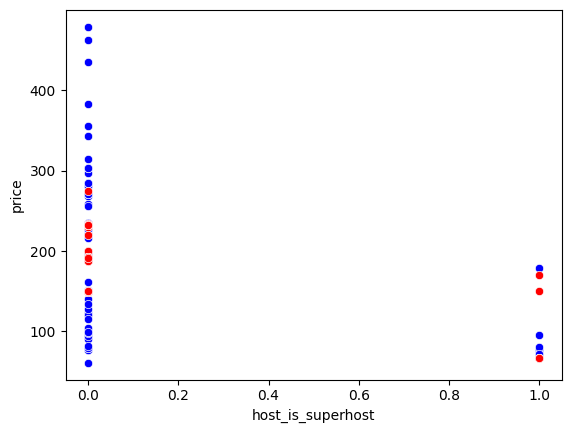

In [294]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)
#sns.lineplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=df)

In [295]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.17415123805065846

In [296]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4173143156550689)

**| accommodates vs bathrooms**

In [297]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bathrooms', 'host_total_listings_count','host_is_superhost']]
Var_Dep= df['accommodates']

In [298]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [299]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [300]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'host_total_listings_count', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.02475288, -0.00820822,  0.99999163]),
 'rank_': 3,
 'singular_': array([436.32374896,   2.09848211,   1.57579775]),
 'intercept_': np.float64(0.15553540650562425)}

In [301]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.33630975637212

In [302]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['bathrooms', 'host_total_listings_count','host_is_superhost']])
y_pred

array([3.15566362, 3.15566362, 5.26582867, 8.02998144, 3.11462249,
       3.14745539, 3.14745539, 3.14745539, 3.12283072, 3.12283072,
       3.12283072, 3.12283072, 3.12283072, 3.13103894, 4.64341538,
       4.59416603, 3.08178959, 3.08178959, 3.08178959, 3.08178959,
       3.08178959, 4.59416603, 4.59416603, 3.08178959, 3.08178959,
       4.59416603, 4.59416603, 3.14745539, 3.13924717, 3.13924717,
       2.94083798, 2.94083798, 2.94083798, 2.94083798, 2.94083798,
       3.08999782, 3.08999782, 3.08999782, 3.08999782, 3.08999782,
       3.08999782, 3.08999782, 3.08999782, 3.08999782, 3.14745539,
       3.14745539, 3.14745539, 2.50721386, 3.08999782, 3.14745539,
       3.14745539, 2.27738356, 2.27738356, 2.27738356, 2.27738356,
       2.27738356, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.06537314, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.06537314, 3.06537314, 3.06537314, 3.06537314, 3.06537314,
       3.08178959, 3.08178959, 3.08178959, 3.08178959])

In [303]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(28, 'Predicciones_accommodates_bathrooms', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='bathrooms', ylabel='accommodates'>

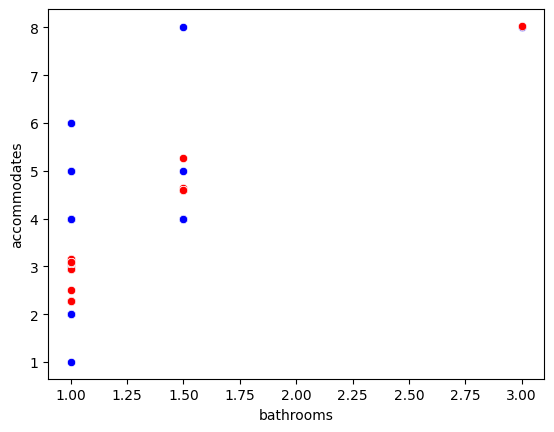

In [304]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)
#sns.lineplot(x='bathrooms', y='Predicciones_accommodates_bathrooms', color="red", data=df)

In [305]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","accommodates_bathrooms","determinacion")] = coef_Deter
coef_Deter

0.33630975637212

In [306]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","accommodates_bathrooms","correlacion")] = coef_Correl
coef_Correl

np.float64(0.5799221985509091)

**| price vs review_scores_cleanliness**

In [307]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_cleanliness', 'review_scores_value','host_total_listings_count']]
Var_Dep= df['price']

In [308]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [309]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [310]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_value',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 14.23041153, -19.91790752,  -0.37397956]),
 'rank_': 3,
 'singular_': array([436.31841836,   2.6957298 ,   1.51457143]),
 'intercept_': np.float64(225.58575065478897)}

In [311]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03494771001366159

In [312]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['review_scores_cleanliness', 'review_scores_value','host_total_listings_count']])
y_pred

array([196.02633205, 196.02633205, 180.03367363,  97.49073063,
       196.63154543, 198.21289284, 198.21289284, 198.21289284,
       194.5304138 , 197.09095415, 197.09095415, 197.09095415,
       197.09095415, 217.61080793, 190.63293559, 195.22105633,
       192.66051598, 192.66051598, 199.23342546, 195.22105633,
       192.66051598, 195.22105633, 192.66051598, 192.66051598,
       192.66051598, 192.66051598, 195.22105633, 198.21289284,
       200.94034932, 200.96586891, 145.65683346, 147.25026607,
       140.67735659, 146.45354977, 147.25026607, 195.59480246,
       194.14344054, 195.11078172, 195.36706919, 196.98882255,
       194.7412112 , 194.99726523, 194.57035289, 193.1192244 ,
       195.65235249, 195.65235249, 195.65235249, 167.3343706 ,
       193.40336577, 198.21289284, 198.21289284, 156.01051871,
       156.01051871, 177.35030022, 156.01051871, 175.92842622,
       197.68875003, 193.33443084, 193.33443084, 181.66572682,
       202.41147258, 197.03363755, 205.68213292, 196.35

In [313]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

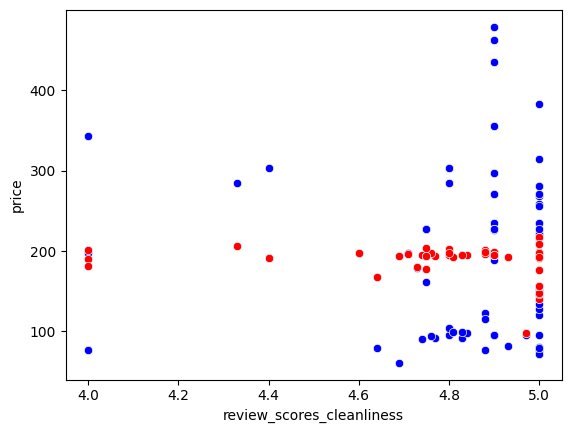

In [314]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=df)

In [315]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.03494771001366159

In [316]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.18694306623585052)

**| price vs host_identity_verified**

In [317]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_identity_verified', 'host_is_superhost','host_acceptance_rate']]
Var_Dep= df['price']

In [318]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [319]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [320]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified', 'host_is_superhost',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([   0.        , -113.60578662, 1842.43520193]),
 'rank_': 2,
 'singular_': array([2.51753157, 0.12188691, 0.        ]),
 'intercept_': np.float64(-1635.5437010247126)}

In [321]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15926163597484266

In [322]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['host_identity_verified', 'host_is_superhost','host_acceptance_rate']])
y_pred

array([206.8915009 , 206.8915009 ,  93.28571429,  93.28571429,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       151.61844485, 151.61844485,  93.28571429,  93.28571429,
        93.28571429,  93.28571429,  93.28571429, 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.8915009 ,
       206.8915009 , 206.8915009 , 206.8915009 , 206.89

In [323]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_host_identity_verified', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='host_identity_verified', ylabel='price'>

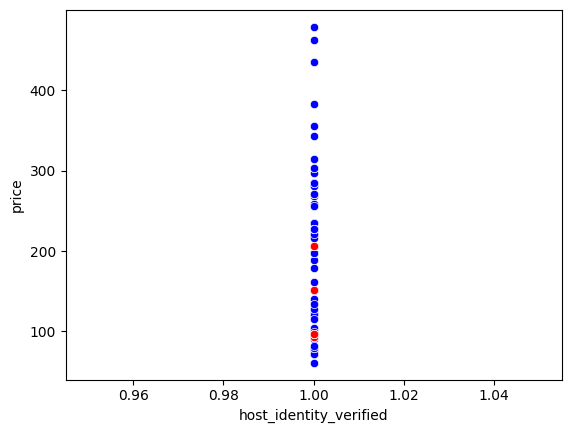

In [324]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=df)

In [325]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.15926163597484266

In [326]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.39907597769703285)

**| price vs instant_bookable**

In [327]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['instant_bookable', 'host_is_superhost','host_total_listings_count']]
Var_Dep= df['price']

In [328]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [329]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [330]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'host_is_superhost',
        'host_total_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([  17.48613463, -131.55643149,    0.2825019 ]),
 'rank_': 3,
 'singular_': array([436.32445447,   2.41756939,   1.19293113]),
 'intercept_': np.float64(176.46188649750945)}

In [331]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.10252363634227613

In [332]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['instant_bookable', 'host_is_superhost','host_total_listings_count']])
y_pred

array([194.79552683, 194.79552683,  77.08168859, 138.10209963,
       196.20803635, 195.07802874, 195.07802874, 195.07802874,
       195.92553444, 195.92553444, 195.92553444, 195.92553444,
       195.92553444, 195.64303254, 195.64303254, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 197.33804396,
       197.33804396, 197.33804396, 197.33804396, 195.07802874,
       195.36053064, 195.36053064,  87.56324236,  87.56324236,
        87.56324236,  87.56324236,  87.56324236, 197.05554206,
       197.05554206, 197.05554206, 197.05554206, 197.05554206,
       197.05554206, 197.05554206, 197.05554206, 197.05554206,
       195.07802874, 195.07802874, 195.07802874, 217.11317717,
       197.05554206, 177.59189411, 177.59189411, 225.02323045,
       225.02323045, 225.02323045, 225.02323045, 225.02323045,
       197.90304777, 197.90304777, 197.90304777, 197.90304777,
       197.90304777, 197.90304777, 197.90304777, 197.90

In [333]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_instant_bookable', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='instant_bookable', ylabel='price'>

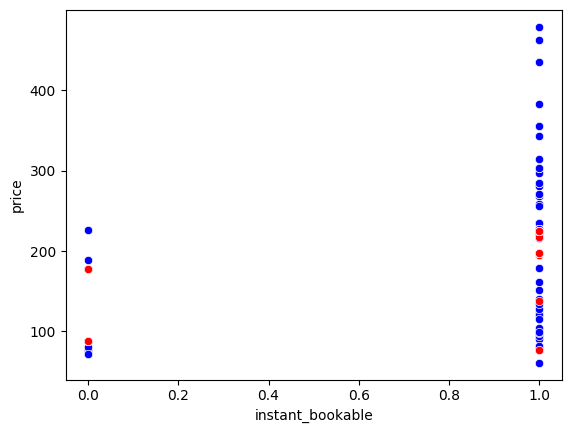

In [334]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=df)

In [335]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.10252363634227613

In [336]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.3201931235087289)

**| price vs property_type**

In [337]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['property_type_encoded', 'reviews_per_month','host_acceptance_rate']]
Var_Dep= df['price']

In [338]:
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [339]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [340]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded', 'reviews_per_month',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ -16.16453545,  -30.50564602, 1602.26783125]),
 'rank_': 3,
 'singular_': array([11.10244826,  6.75285592,  0.11639776]),
 'intercept_': np.float64(-1368.8779762849101)}

In [341]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2449913111643761

In [342]:
#Predecimos los valores mediante 3 variables
y_pred= model.predict(X=df[['property_type_encoded', 'reviews_per_month','host_acceptance_rate']])
y_pred

array([216.92026305, 216.31015013, 169.63996865, 146.14716427,
       155.91242794, 217.22531951, 217.22531951, 217.22531951,
       232.16962912, 233.38985496, 233.38985496, 233.38985496,
       233.38985496, 198.01021945, 199.53550176, 201.06078406,
       199.84055822, 200.45067114, 199.2304453 , 201.06078406,
       200.45067114, 201.06078406, 199.2304453 , 200.7557276 ,
       200.7557276 , 200.7557276 , 201.06078406, 233.38985496,
       146.28150699, 150.55229744, 199.2304453 , 198.31527591,
       195.56976777, 197.70516299, 196.78999361, 116.86520103,
       154.6922021 , 122.96633024, 154.08208918, 100.08709572,
        94.90113589,  34.49995677,  29.92410986, 107.1033943 ,
       232.77974204, 200.45067114, 232.77974204, 133.64330634,
        98.86686988, 217.22531951, 217.22531951, 215.70003721,
       216.61520659, 214.78486783, 216.61520659, 205.93823048,
       229.42412098, 230.64434682, 227.28872576, 232.47468558,
       225.15333053, 225.15333053, 226.06849992, 229.11

In [343]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(32, 'Predicciones_price_property_type', y_pred)
df  

last_scraped           source  \
0    2024-09-23  previous scrape   
1    2024-09-23      city scrape   
2    2024-09-23      city scrape   
3    2024-09-23      city scrape   
4    2024-09-23      city scrape   
..          ...              ...   
69   2024-09-23      city scrape   
70   2024-09-23      city scrape   
71   2024-09-23      city scrape   
72   2024-09-23      city scrape   
73   2024-09-23      city scrape   

                                                 name  \
0   Standard Double Room with private shower & Bal...   
1           Triple Room with private shower & Balcony   
2     Exceptional Penthouse close to Acropolis by GHH   
3           Acropolis Grand Residence, Stunning Views   
4             AcropolisView -Two Bedroom Apt by Meros   
..                                                ...   
69                  The Duke suite 201 (studio suite)   
70   Deluxe Apartment | Alekos Apartments 1 (Netflix)   
71  Deluxe Family Apt. | Alekos Apartments 1 (Netf...   
72   2 Bedroom Apart. | Alekos Apartments 1 (Netflix)   
73    Maisonette Acropolis View | Alekos Apartments 1   

                                          description  \
0   My place is close to restaurants and dining, p...   
1   My place is close to restaurants and dining, p...   
2   This exceptional Penthouse close to the Acropo...   
3   Located in a 1930’s neoclassical building, dir...   
4   The apartment is located at the foothills of A...   
..                                                ...   
69  The suite has soft neutral palettes, a comfort...   
70  Offering luxury and comfort, it's the perfect ...   
71  Offering luxury and comfort, it is the perfect...   
72  Offering luxury and comfort, it's the perfect ...   
73  Offering luxury and comfort, it's the perfect ...   

                                neighborhood_overview             host_name  \
0                                       No disponible          Konstantinos   
1                                       No disponible          Konstantinos   
2   A formerly low-profile neighborhood at the foo...  Golden Home Holidays   
3   The residence is located at 12 Syggrou avenue ...             Vasileios   
4   Thissio is a traditional neighborhood in downt...                 Meros   
..                                                ...                   ...   
69  Kolonaki is a vivid area thanks to a well-bala...              The Duke   
70  Alekos Apartments is located in a quiet and ol...               Alexios   
71  Alekos Apartments is located in a quiet and ol...               Alexios   
72  Alekos Apartments is located in a quiet and ol...               Alexios   
73  Alekos Apartments is located in a quiet and ol...               Alexios   

    host_since   host_location  \
0   2016-01-10  Athens, Greece   
1   2016-01-10  Athens, Greece   
2   2015-10-20  Athens, Greece   
3   2017-01-31  Athens, Greece   
4   2015-05-06  Athens, Greece   
..         ...             ...   
69  2019-08-25   No disponible   
70  2019-01-18  Athens, Greece   
71  2019-01-18  Athens, Greece   
72  2019-01-18  Athens, Greece   
73  2019-01-18  Athens, Greece   

                                           host_about host_response_time  ...  \
0                                       No disponible     within an hour  ...   
1                                       No disponible     within an hour  ...   
2   Find your own home in Greece, for holidays or ...     within an hour  ...   
3   We are Bill & John two young entrepreneurs wit...     within an hour  ...   
4   Hi, we are Meros team and we will be your host...     within an hour  ...   
..                                                ...                ...  ...   
69                                      No disponible     within an hour  ...   
70                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
71                          Ξενοδοχειο   Διαμερισματα     within an hour  ...   
72                          Ξενο

<Axes: xlabel='property_type_encoded', ylabel='price'>

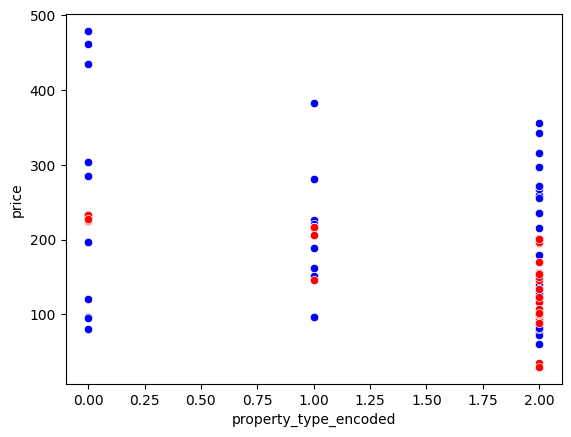

In [344]:
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=df)

In [345]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
resultados[("Shared_room","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.2449913111643761

In [346]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
resultados[("Shared_room","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4949659697033485)

# Tabla de coeficientes de determinación y correlación

In [347]:
filas = []
for (dataset, comparacion, tipo), valor in resultados.items():
    filas.append({"Dataset": dataset, "Comparación": comparacion, "Tipo": tipo, "Valor": valor})

# Crear DataFrame
df = pd.DataFrame(filas)

# Mostrar la tabla con formato pivotado
df_pivot = df.pivot(index=["Dataset", "Comparación"], columns="Tipo", values="Valor")
print(df_pivot)

Tipo                                          correlacion  determinacion
Dataset      Comparación                                                
Entire_home  accommodates_bathrooms              0.690949       0.477411
             price_host_acceptance_rate          0.099899       0.009980
             price_host_identity_verified        0.138465       0.019173
             price_host_is_superhost             0.161456       0.026068
             price_instant_bookable              0.098012       0.009606
             price_property_type                 0.152962       0.023397
             price_review_scores_cleanliness     0.176913       0.031298
Hotel_room   accommodates_bathrooms              0.579922       0.336310
             price_host_acceptance_rate          0.467829       0.218864
             price_host_identity_verified        0.399076       0.159262
             price_host_is_superhost             0.417314       0.174151
             price_instant_bookable              0.